### Assignment 4 Option 2

# The Relationship Between Tectonic Activity and Mining Activity

##### Name: Terry Rozmus (not a member of a group) 

##### Student ID: 94131529

##### Python Version number: 2.7.14

### Part 5 of 5

## Contents

<table>
<tbody>
    <tr>
        <td>
            &nbsp; &nbsp;
        </td>
        <td style="text-align: left;">
            <a href="#EDA">Exploratory Analysis of Aggregated Data</a>
        </td>
    </tr>
    <tr>
        <td></td>
        <td style="text-align: left;">
            &nbsp; &nbsp; 
            <a href="#VolcanoPredictors">Volcanoes As Predictors</a>
        </td>
    </tr>
    <tr>
        <td></td>
        <td style="text-align: left;">
            &nbsp; &nbsp; 
            <a href="#EarthquakesPredictors">Earthquake As Predictors</a>
        </td>
    </tr>
    <tr>
        <td></td>
        <td style="text-align: left;">
            &nbsp; &nbsp; 
            <a href="#MountainPredictors">Mountains As Predictors</a>
        </td>
    </tr>
    <tr>
        <td></td>
        <td style="text-align: left;">
            &nbsp; &nbsp; 
            <a href="#TectonicPredictors">Single Tectonic Features As Predictors</a>
        </td>
    </tr>
    <tr>
        <td></td>
        <td style="text-align: left;">
            &nbsp; &nbsp; 
            <a href="#CorrelationEarthquakesVolcanoes">Correlation of Earthquakes With Volcanoes</a>
        </td>
    </tr>
    <tr>
        <td></td>
        <td style="text-align: left;">
            &nbsp; &nbsp; 
            <a href="#CorrelationEarthquakesMountains">Correlation of Earthquakes With Mountains</a>
        </td>
    </tr>
    <tr>
        <td></td>
        <td style="text-align: left;">
            &nbsp; &nbsp; 
            <a href="#CorrelationVolcanoesMountains">Correlation of Volcanoes With Mountains</a>
        </td>
    </tr>
    <tr>
        <td>
            &nbsp; &nbsp;
        </td>
        <td style="text-align: left;">
            <a href="#DA">Analysis of Aggregated Data</a>
        </td>
    </tr>
    <tr>
        <td></td>
        <td style="text-align: left;">
            &nbsp; &nbsp; 
            <a href="#Regression">Ordinary Least Squares Regression</a>
        </td>
    </tr>
    <tr>
        <td>
            &nbsp; &nbsp;
        </td>
        <td style="text-align: left;">
            <a href="#Conclusion">Conclusion</a>
        </td>
    </tr>
    
</tbody>
</table>
<br>

<a name="EDA"></a>
## Exploratory Analysis of Aggregated Data

<a name="VolcanoPredictors"></a>
### Volcanoes As Predictors

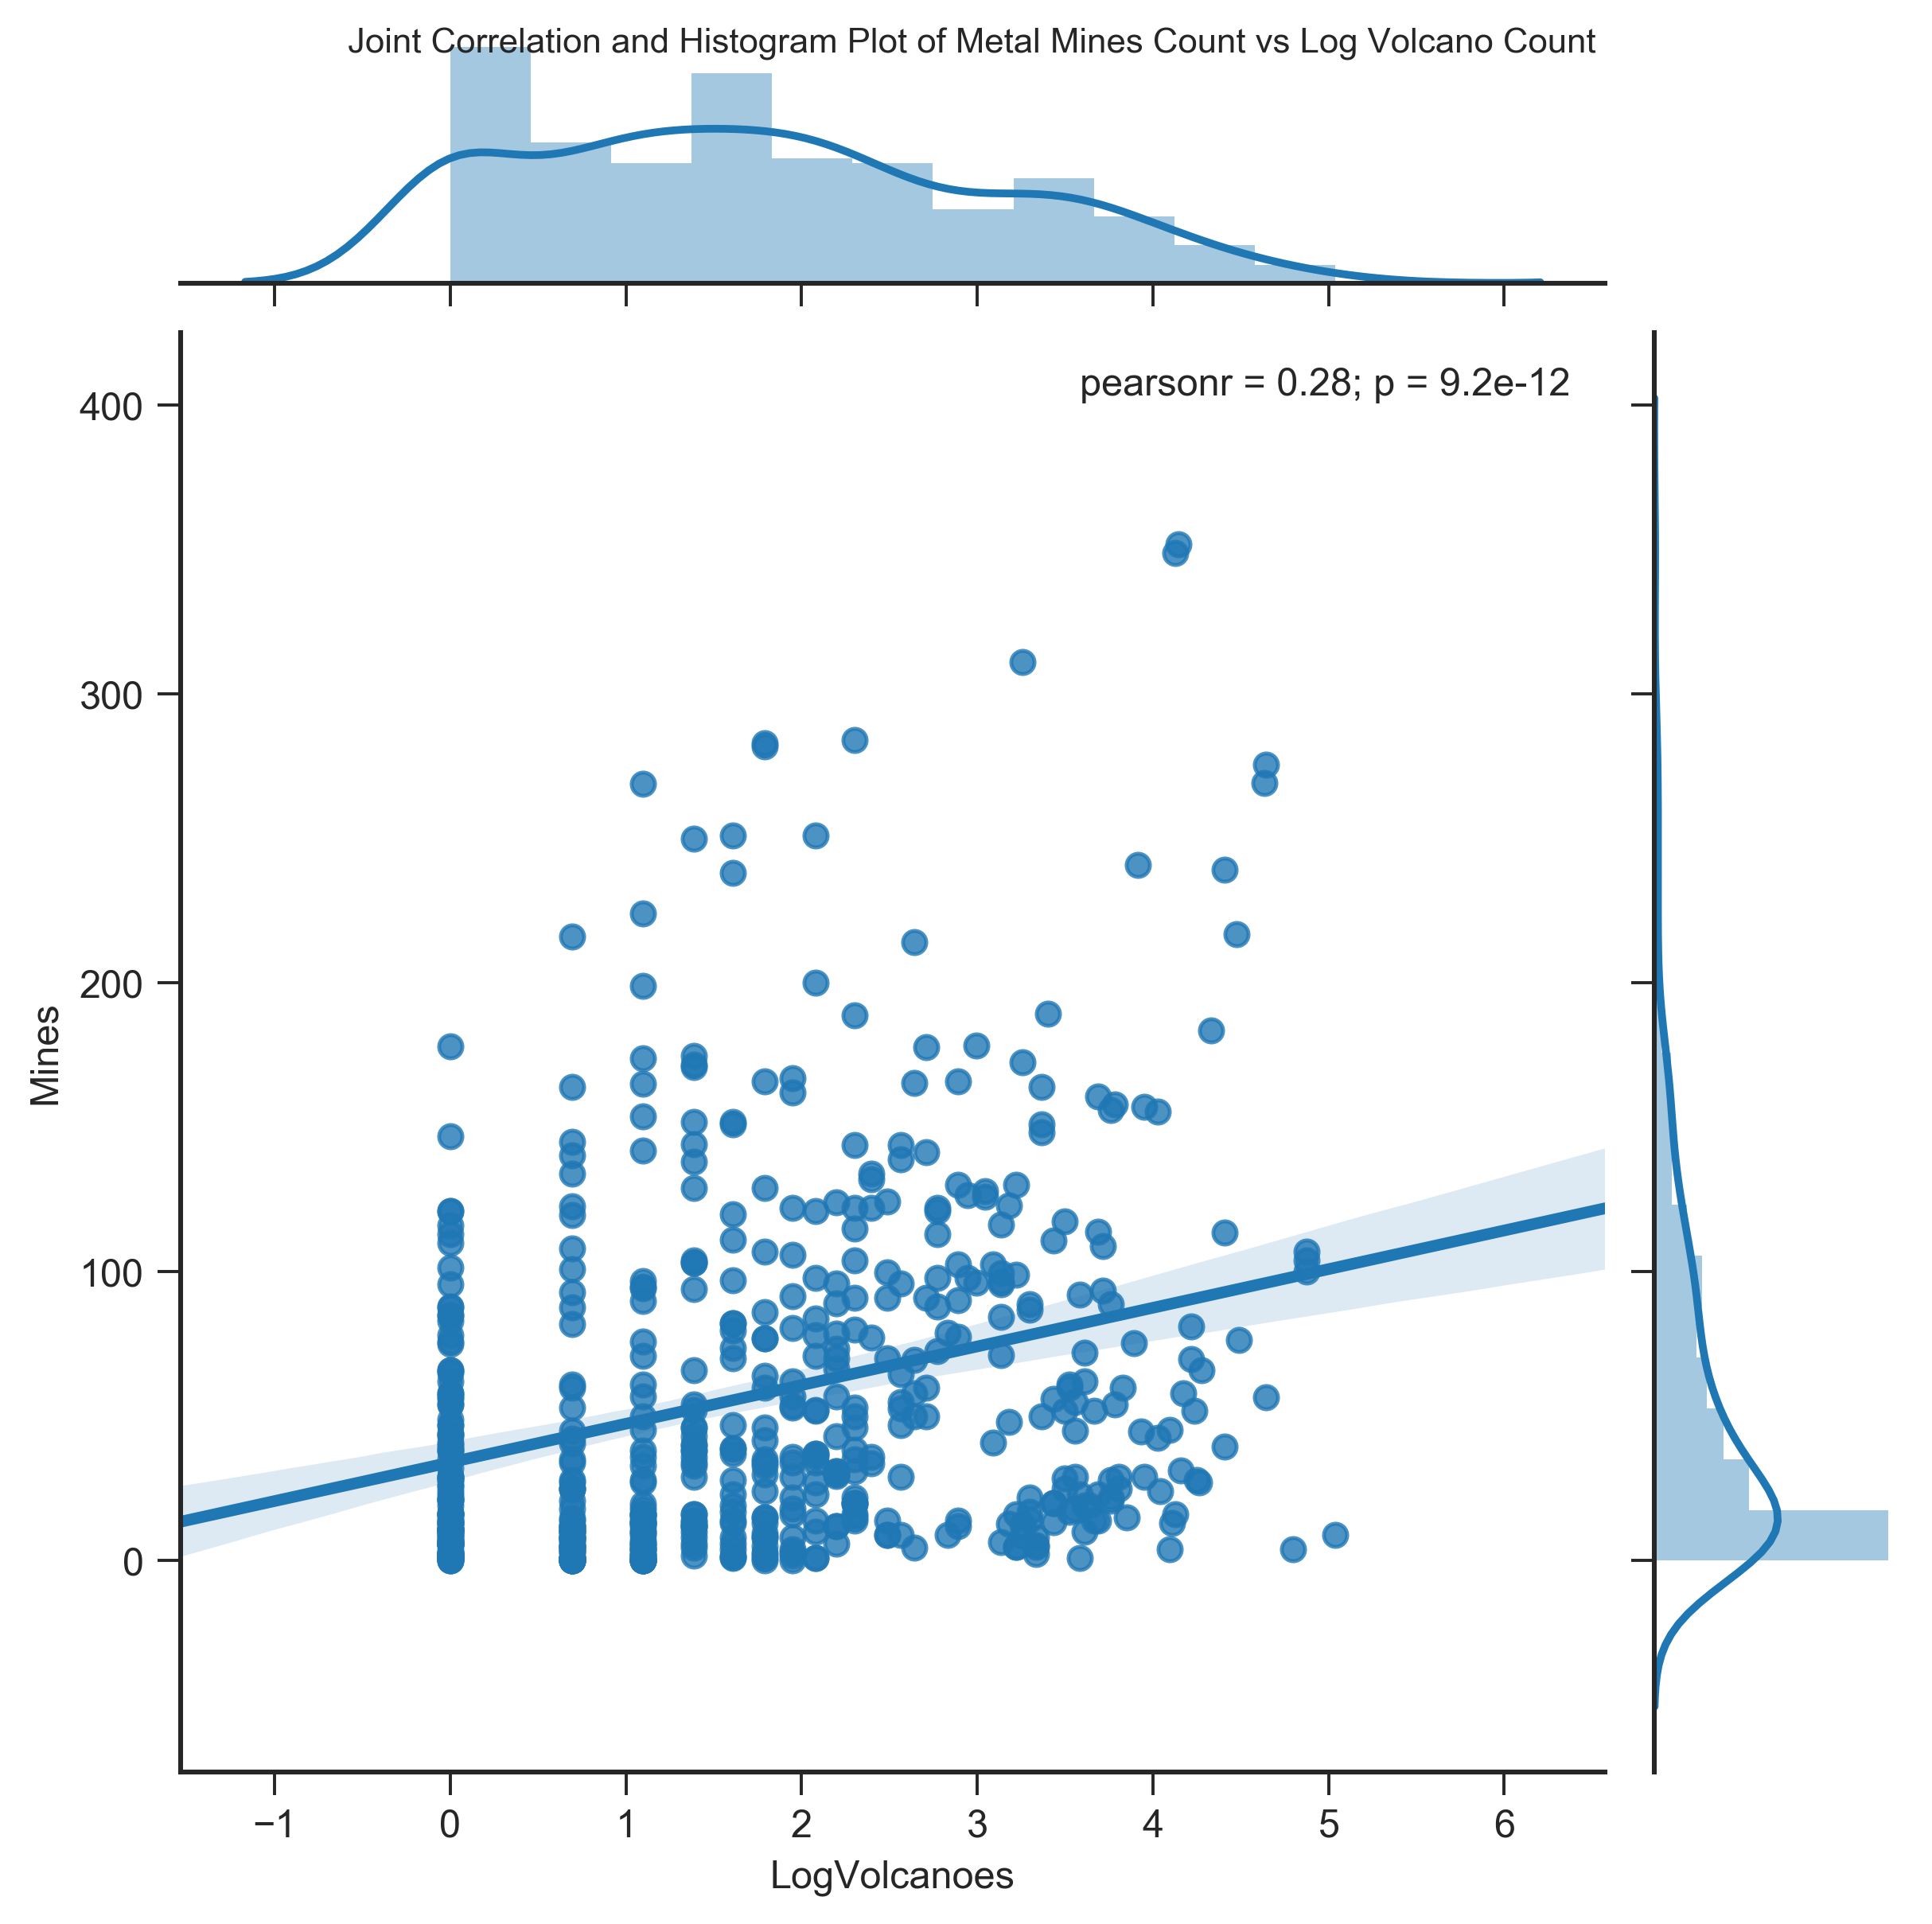

In [12]:
title = 'Joint Correlation and Histogram Plot of Metal Mines Count vs Log Volcano Count'
correlationPlot(samples, 'LogVolcanoes', 'Mines', title)

At a pearson coefficient of 0.28, the correlation between volcanoes and the count of mines present is modest, but reasonably clear (0 for a low correlation, 1 for a strong correlation) and the low p-value (less than 0.05 indicating the probability of seeing these results by chance is less than 5% if the null hypothesis that there is no relationship between the predictor and response variables is true).

Interpreting the figures by back-transformation, Volcano Count = e<sup>LogVolcanoes</sup>. So for examples, since e<sup>6</sup> = 403, this means the presence 400 volcanoes in a 500 kilometre radius (the size of each test sample area) predicts the presence of around 130 metal mines according to this graph. Given the spread of the data though this could be up to a hundred mines greater or lesser that than this value. Also e<sup>-1</sup> is close to zero, so this graph realistically predicts that 0 volcanoes in a region predicts few metal mines will be present as well.

Next I will look at whether this pattern holds when there are at least some mountains present:

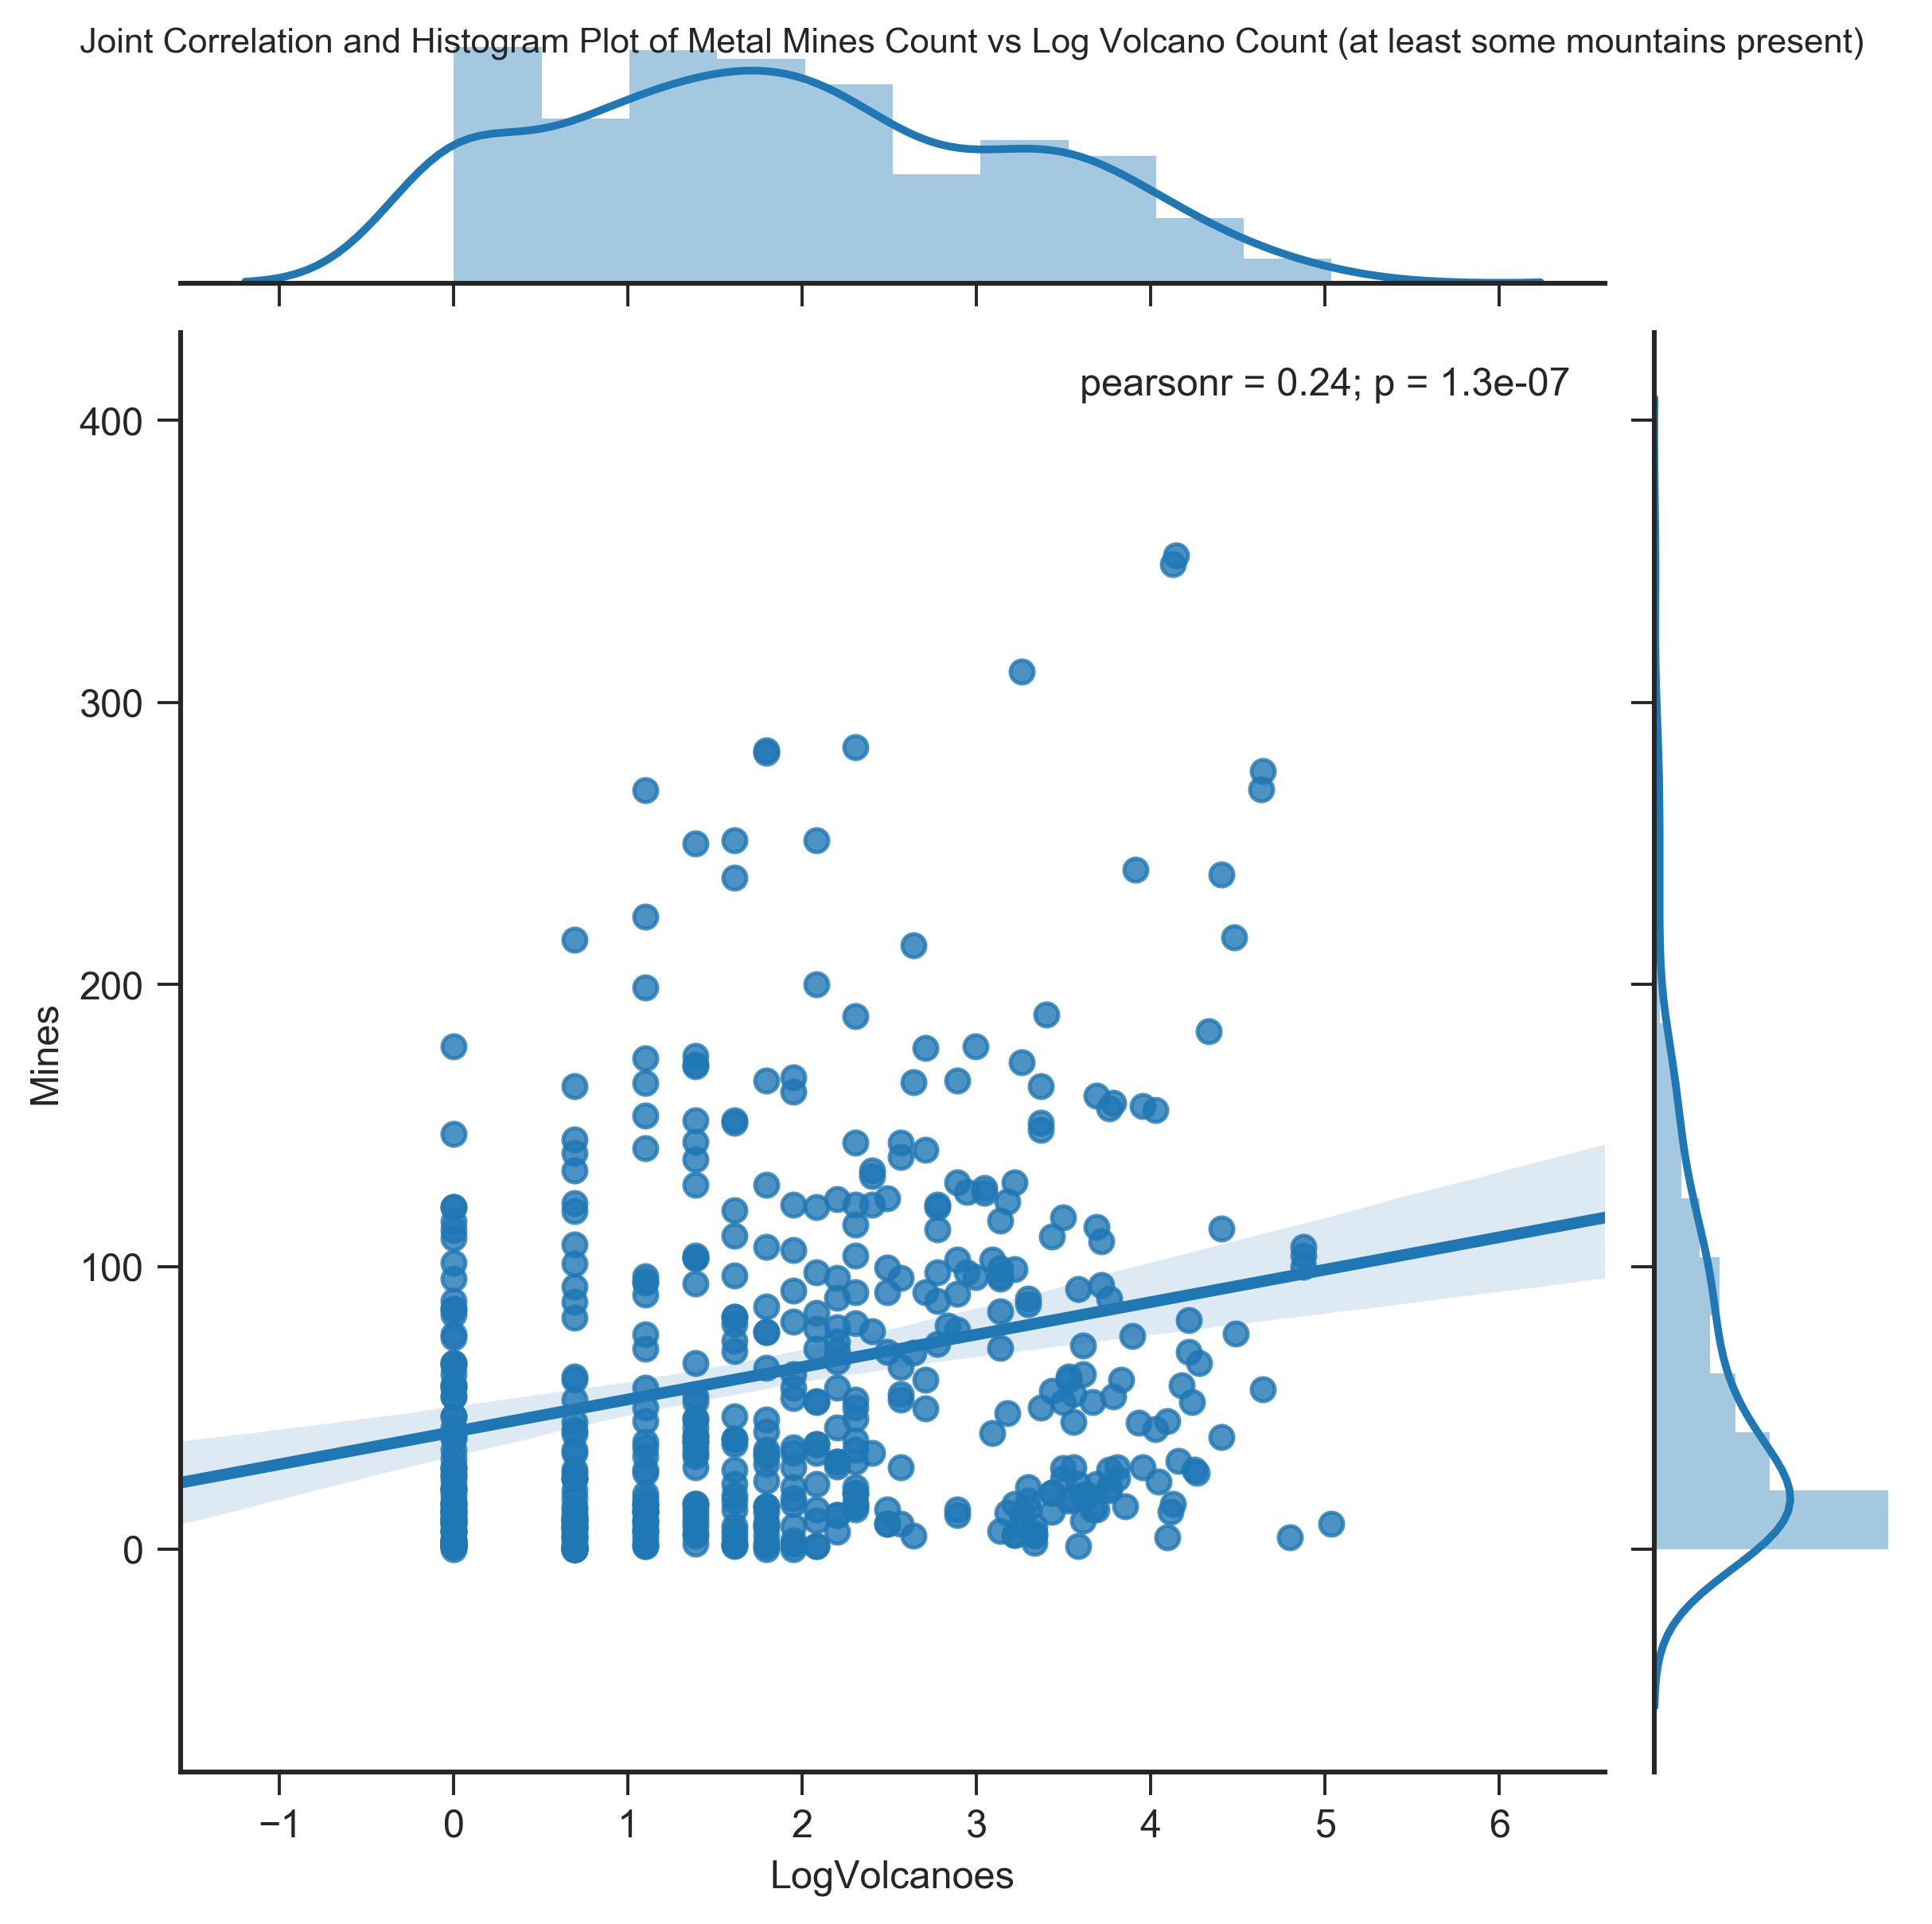

In [13]:
title = 'Joint Correlation and Histogram Plot of Metal Mines Count vs Log Volcano Count (at least some mountains present)'
filtered = samples[samples['MountainPercentage'] > 0]
correlationPlot(filtered, 'LogVolcanoes', 'Mines', title)

The strength of the correlation is similar in the case where there are at least some mountains present.

What about when there is at least one volcano in the region?

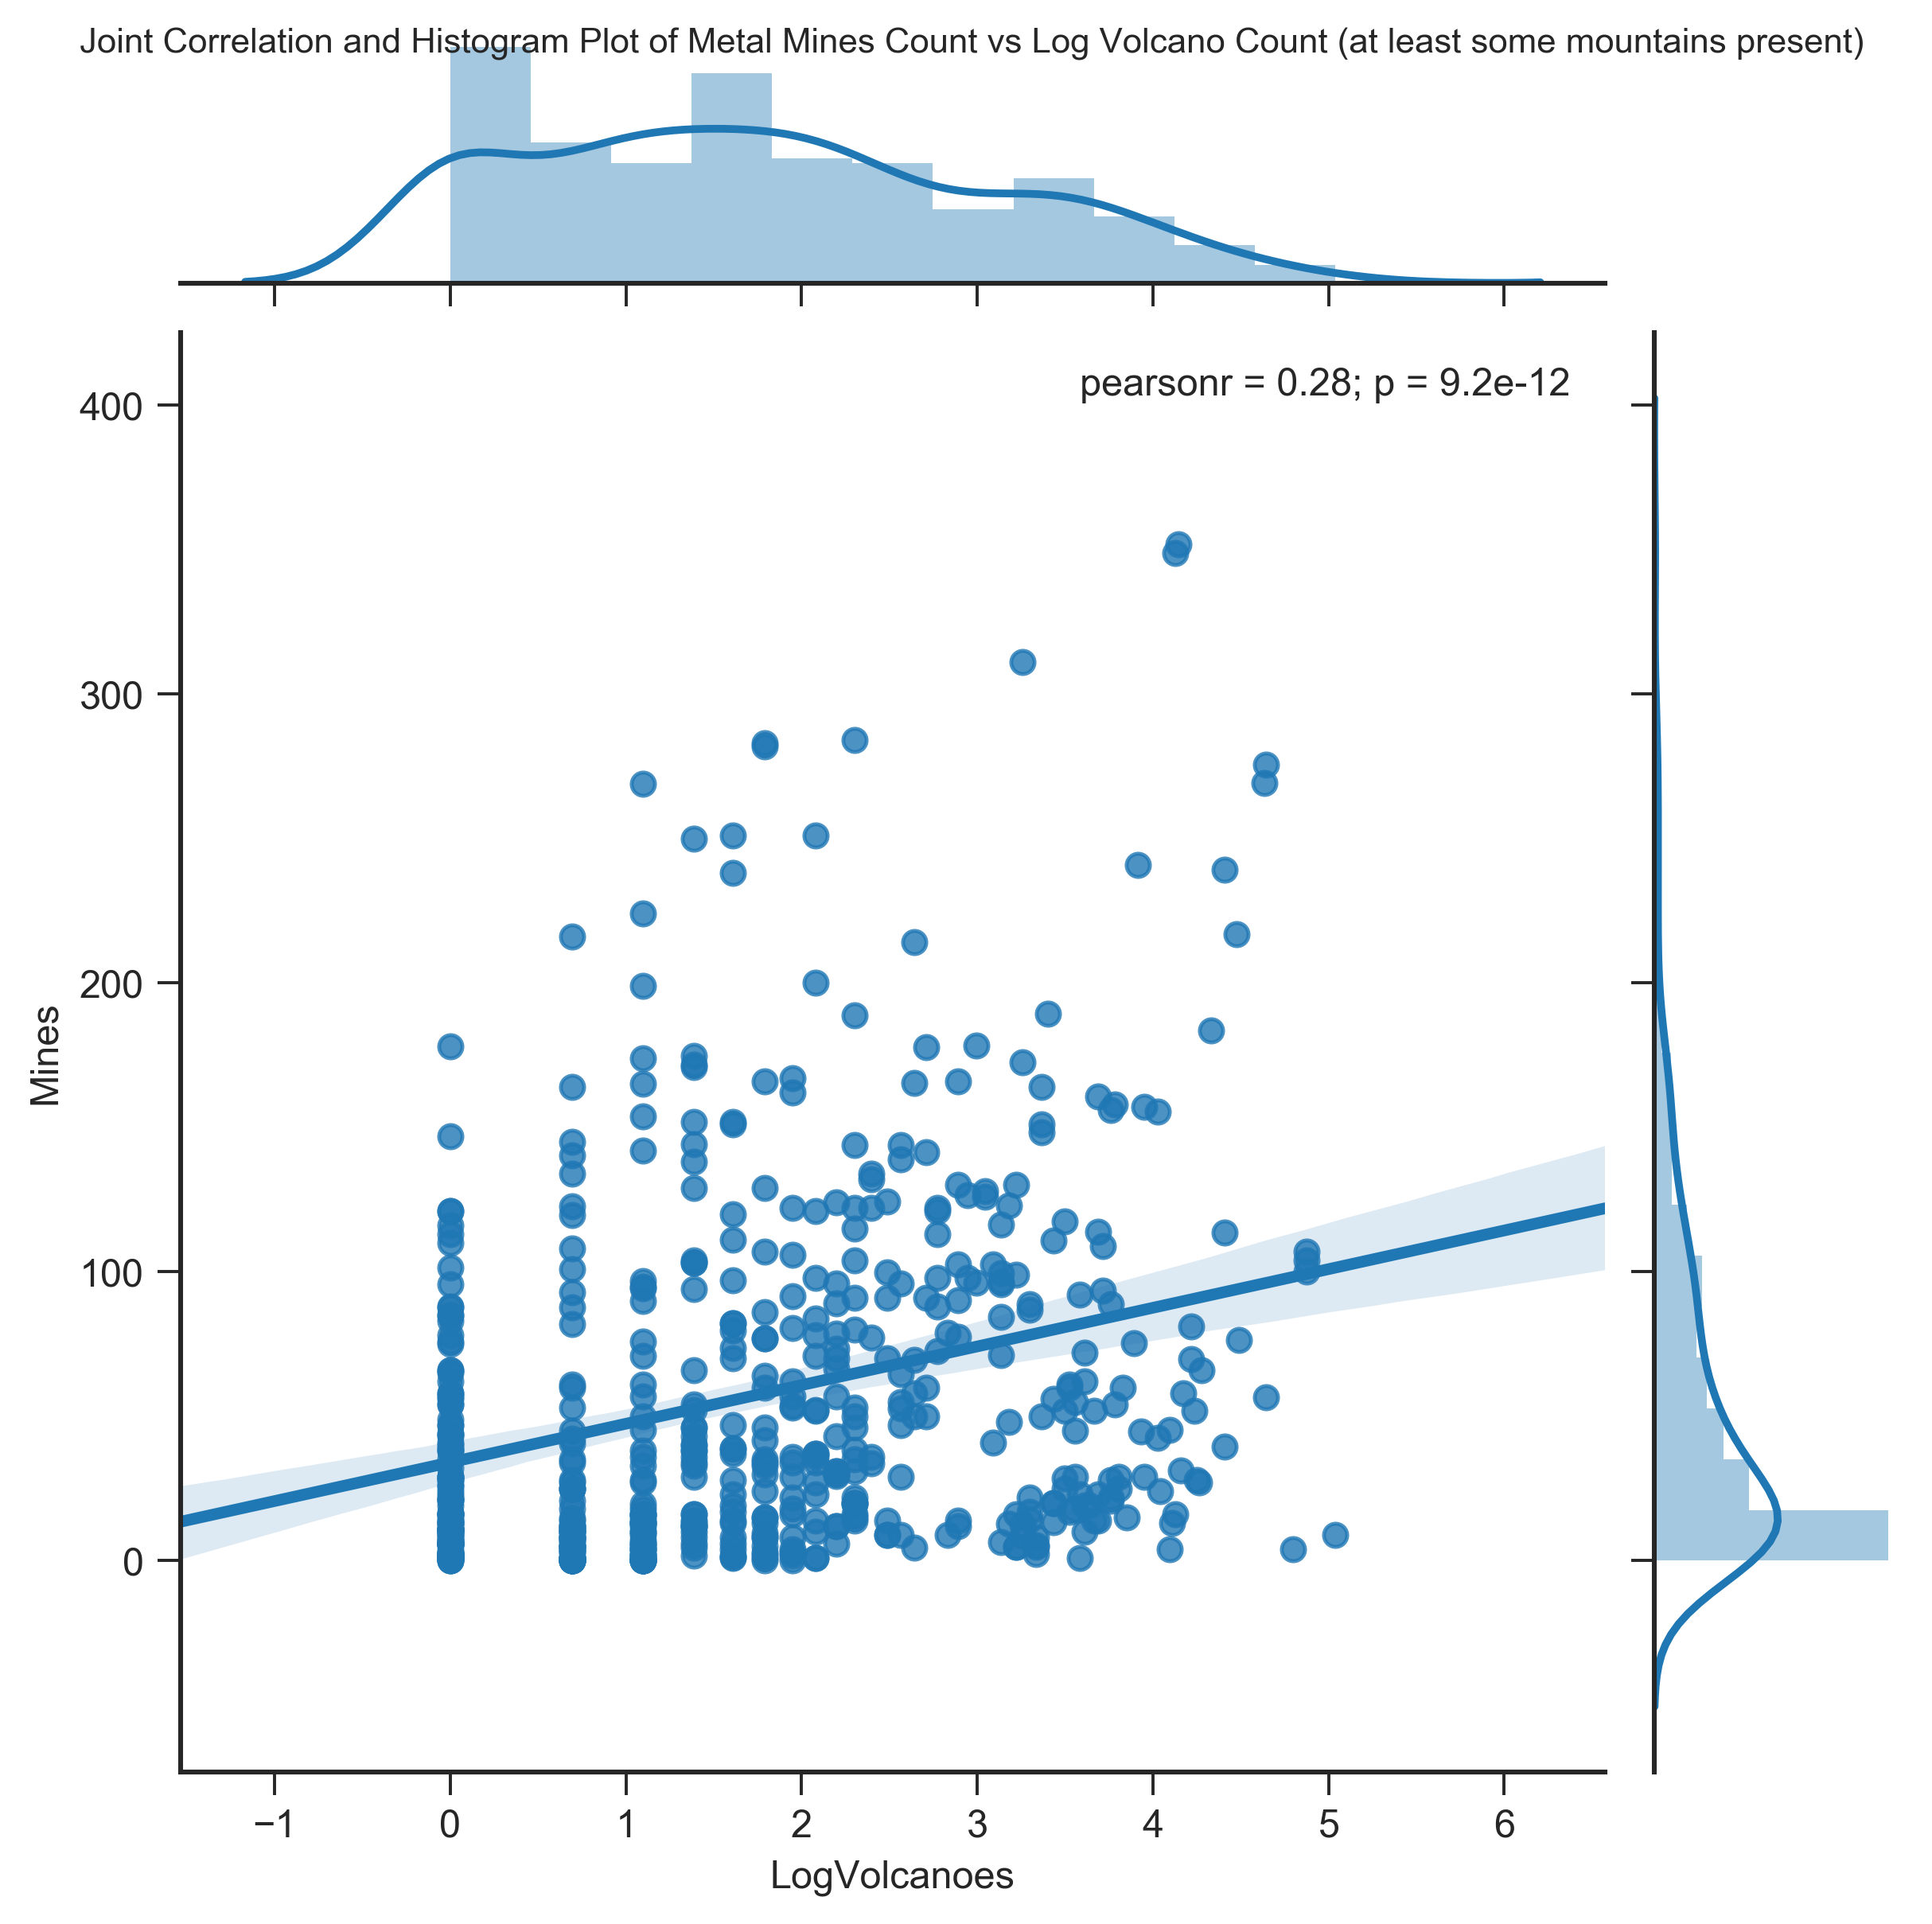

In [14]:
title = 'Joint Correlation and Histogram Plot of Metal Mines Count vs Log Volcano Count (at least some mountains present)'
filtered = samples[samples['Volcanoes'] > 0]
correlationPlot(filtered, 'LogVolcanoes', 'Mines', title)

According to this graph, the strength of the correlation is identical to the when all samples are being examined.

What about in the situation where there are many mountains in the area?

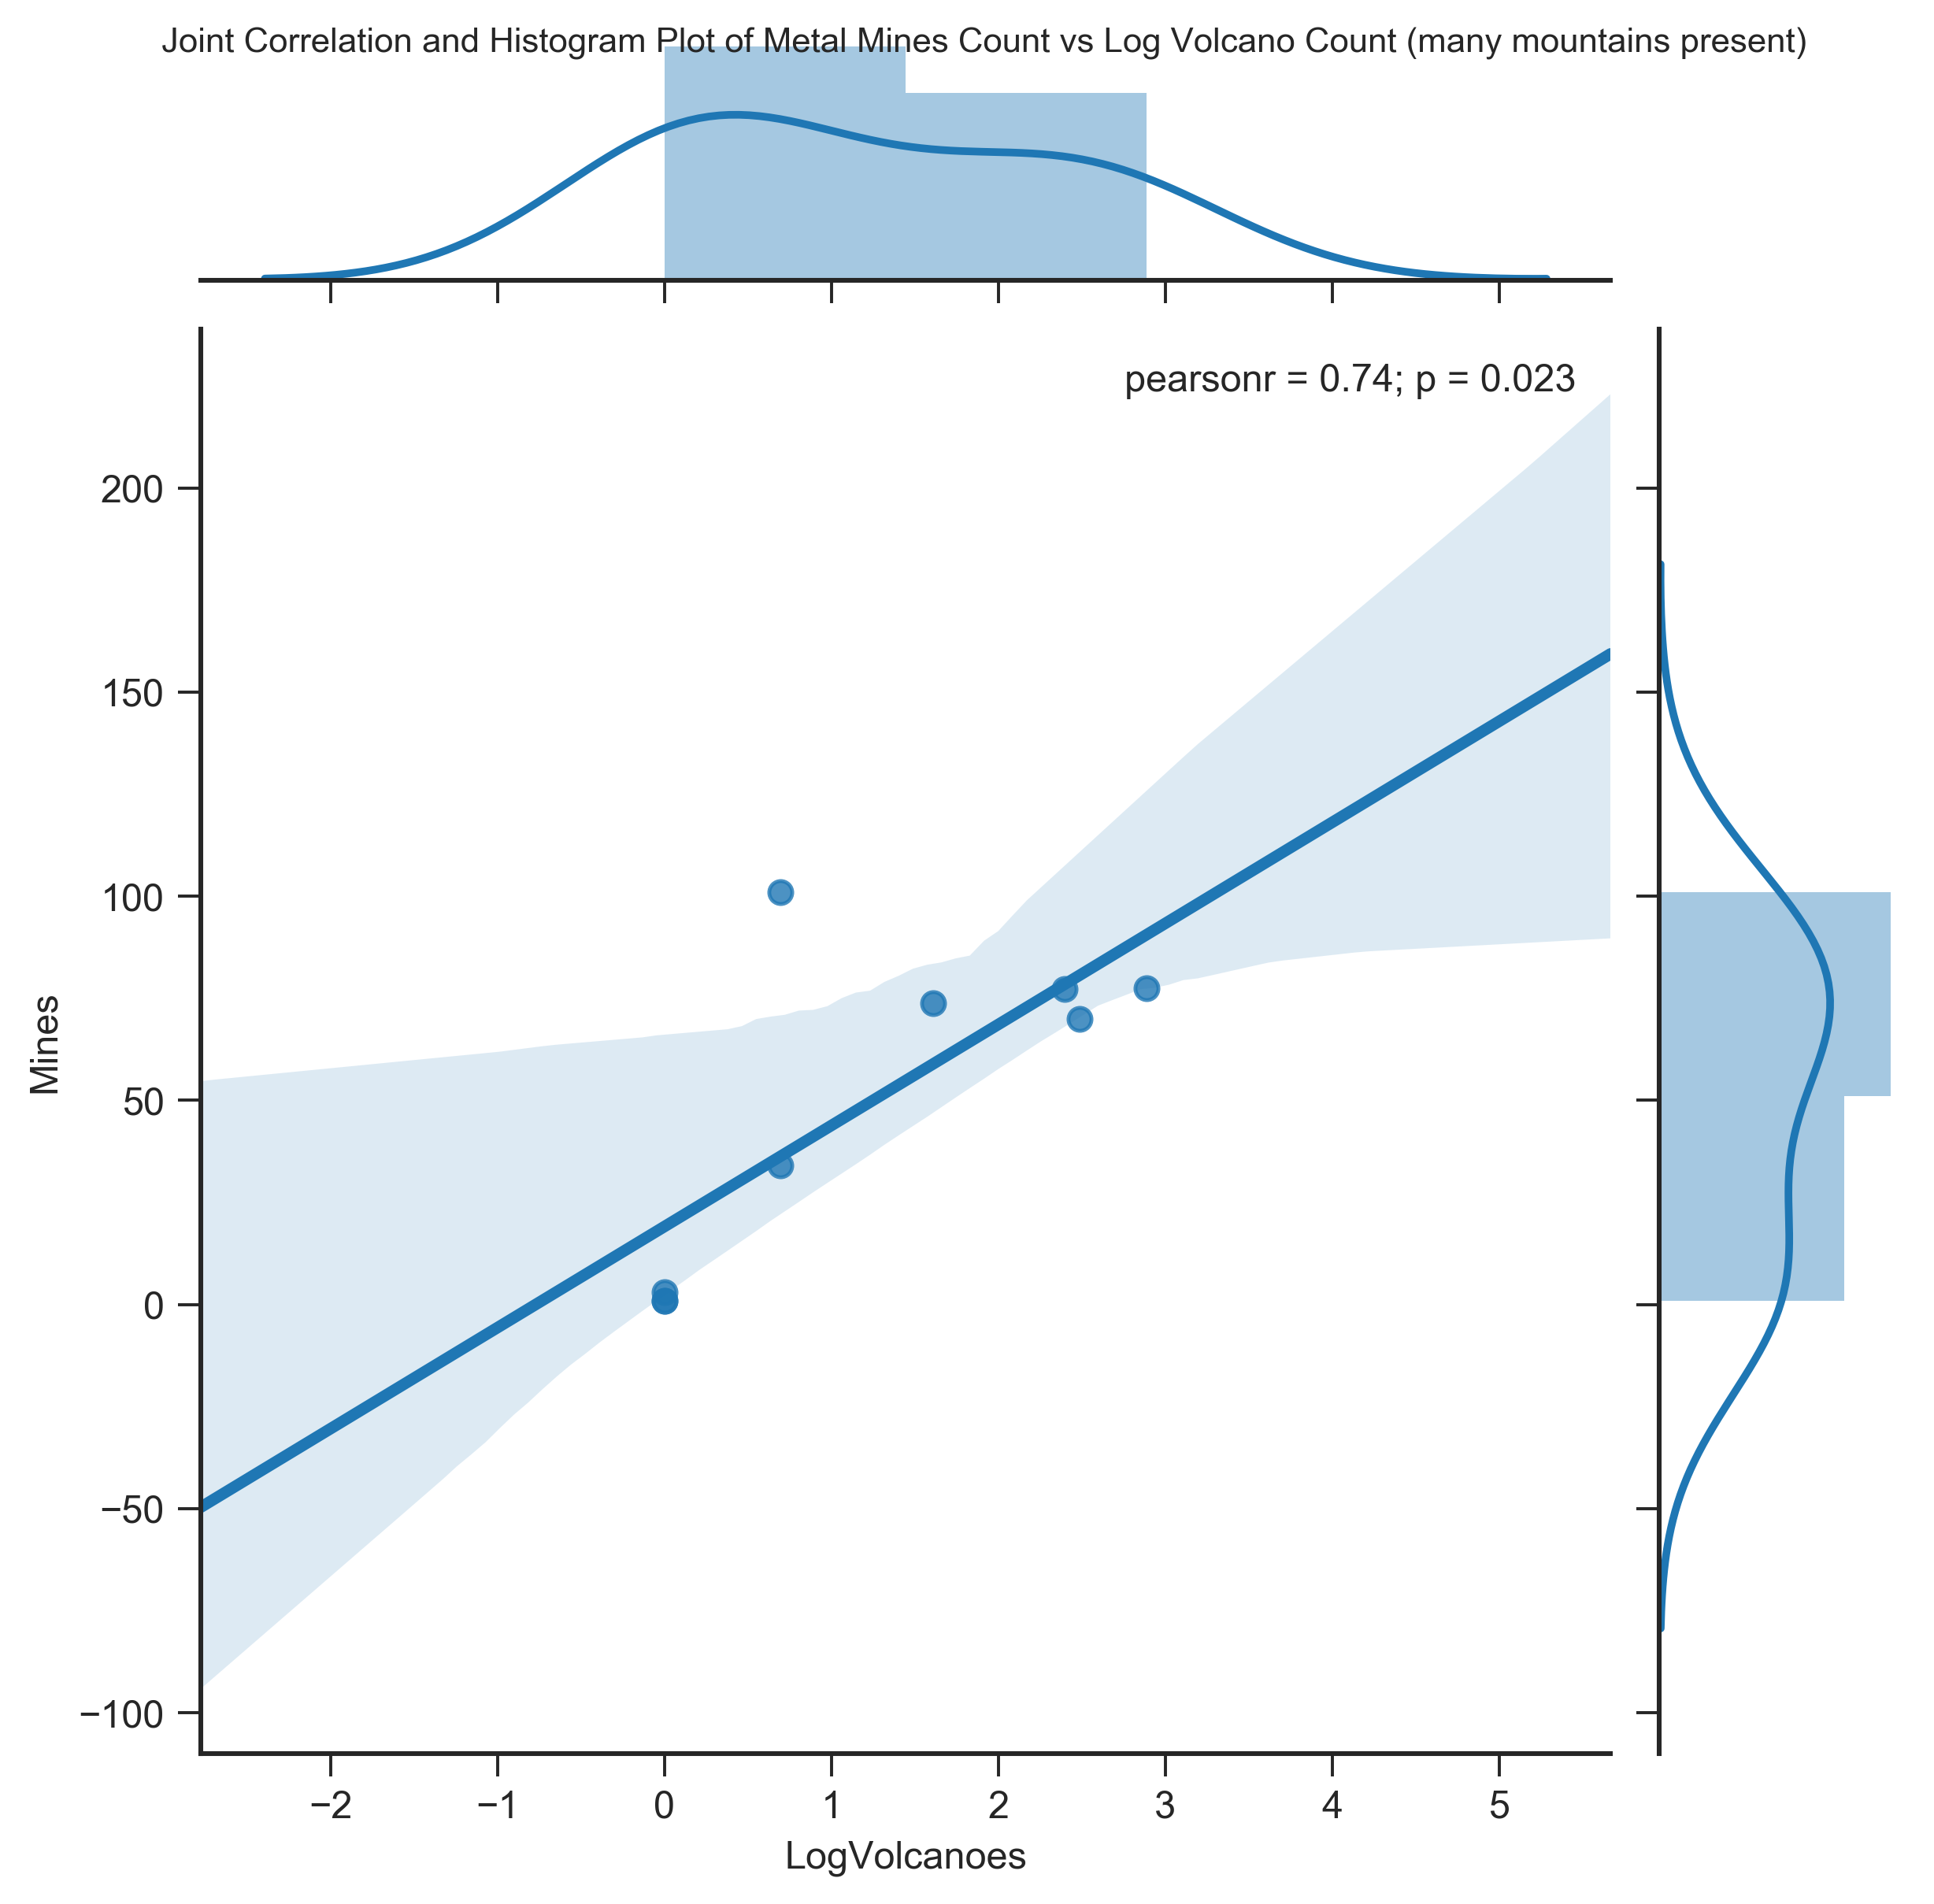

In [15]:
title = 'Joint Correlation and Histogram Plot of Metal Mines Count vs Log Volcano Count (many mountains present)'
filtered = samples[samples['MountainPercentage'] > 80]
correlationPlot(filtered, 'LogVolcanoes', 'Mines', title)

According to this graph, the strength of the correlation of log Volcano count to Mine count is very high. However, as you can see below this relates to only 25 samples out of the full sample set of around 1000, so this result is interesting, but probably not very realtistic or useful.

In [16]:
len(filtered)

22

<a name="EarthquakePredictors"></a>
### Earthquakes As Predictors

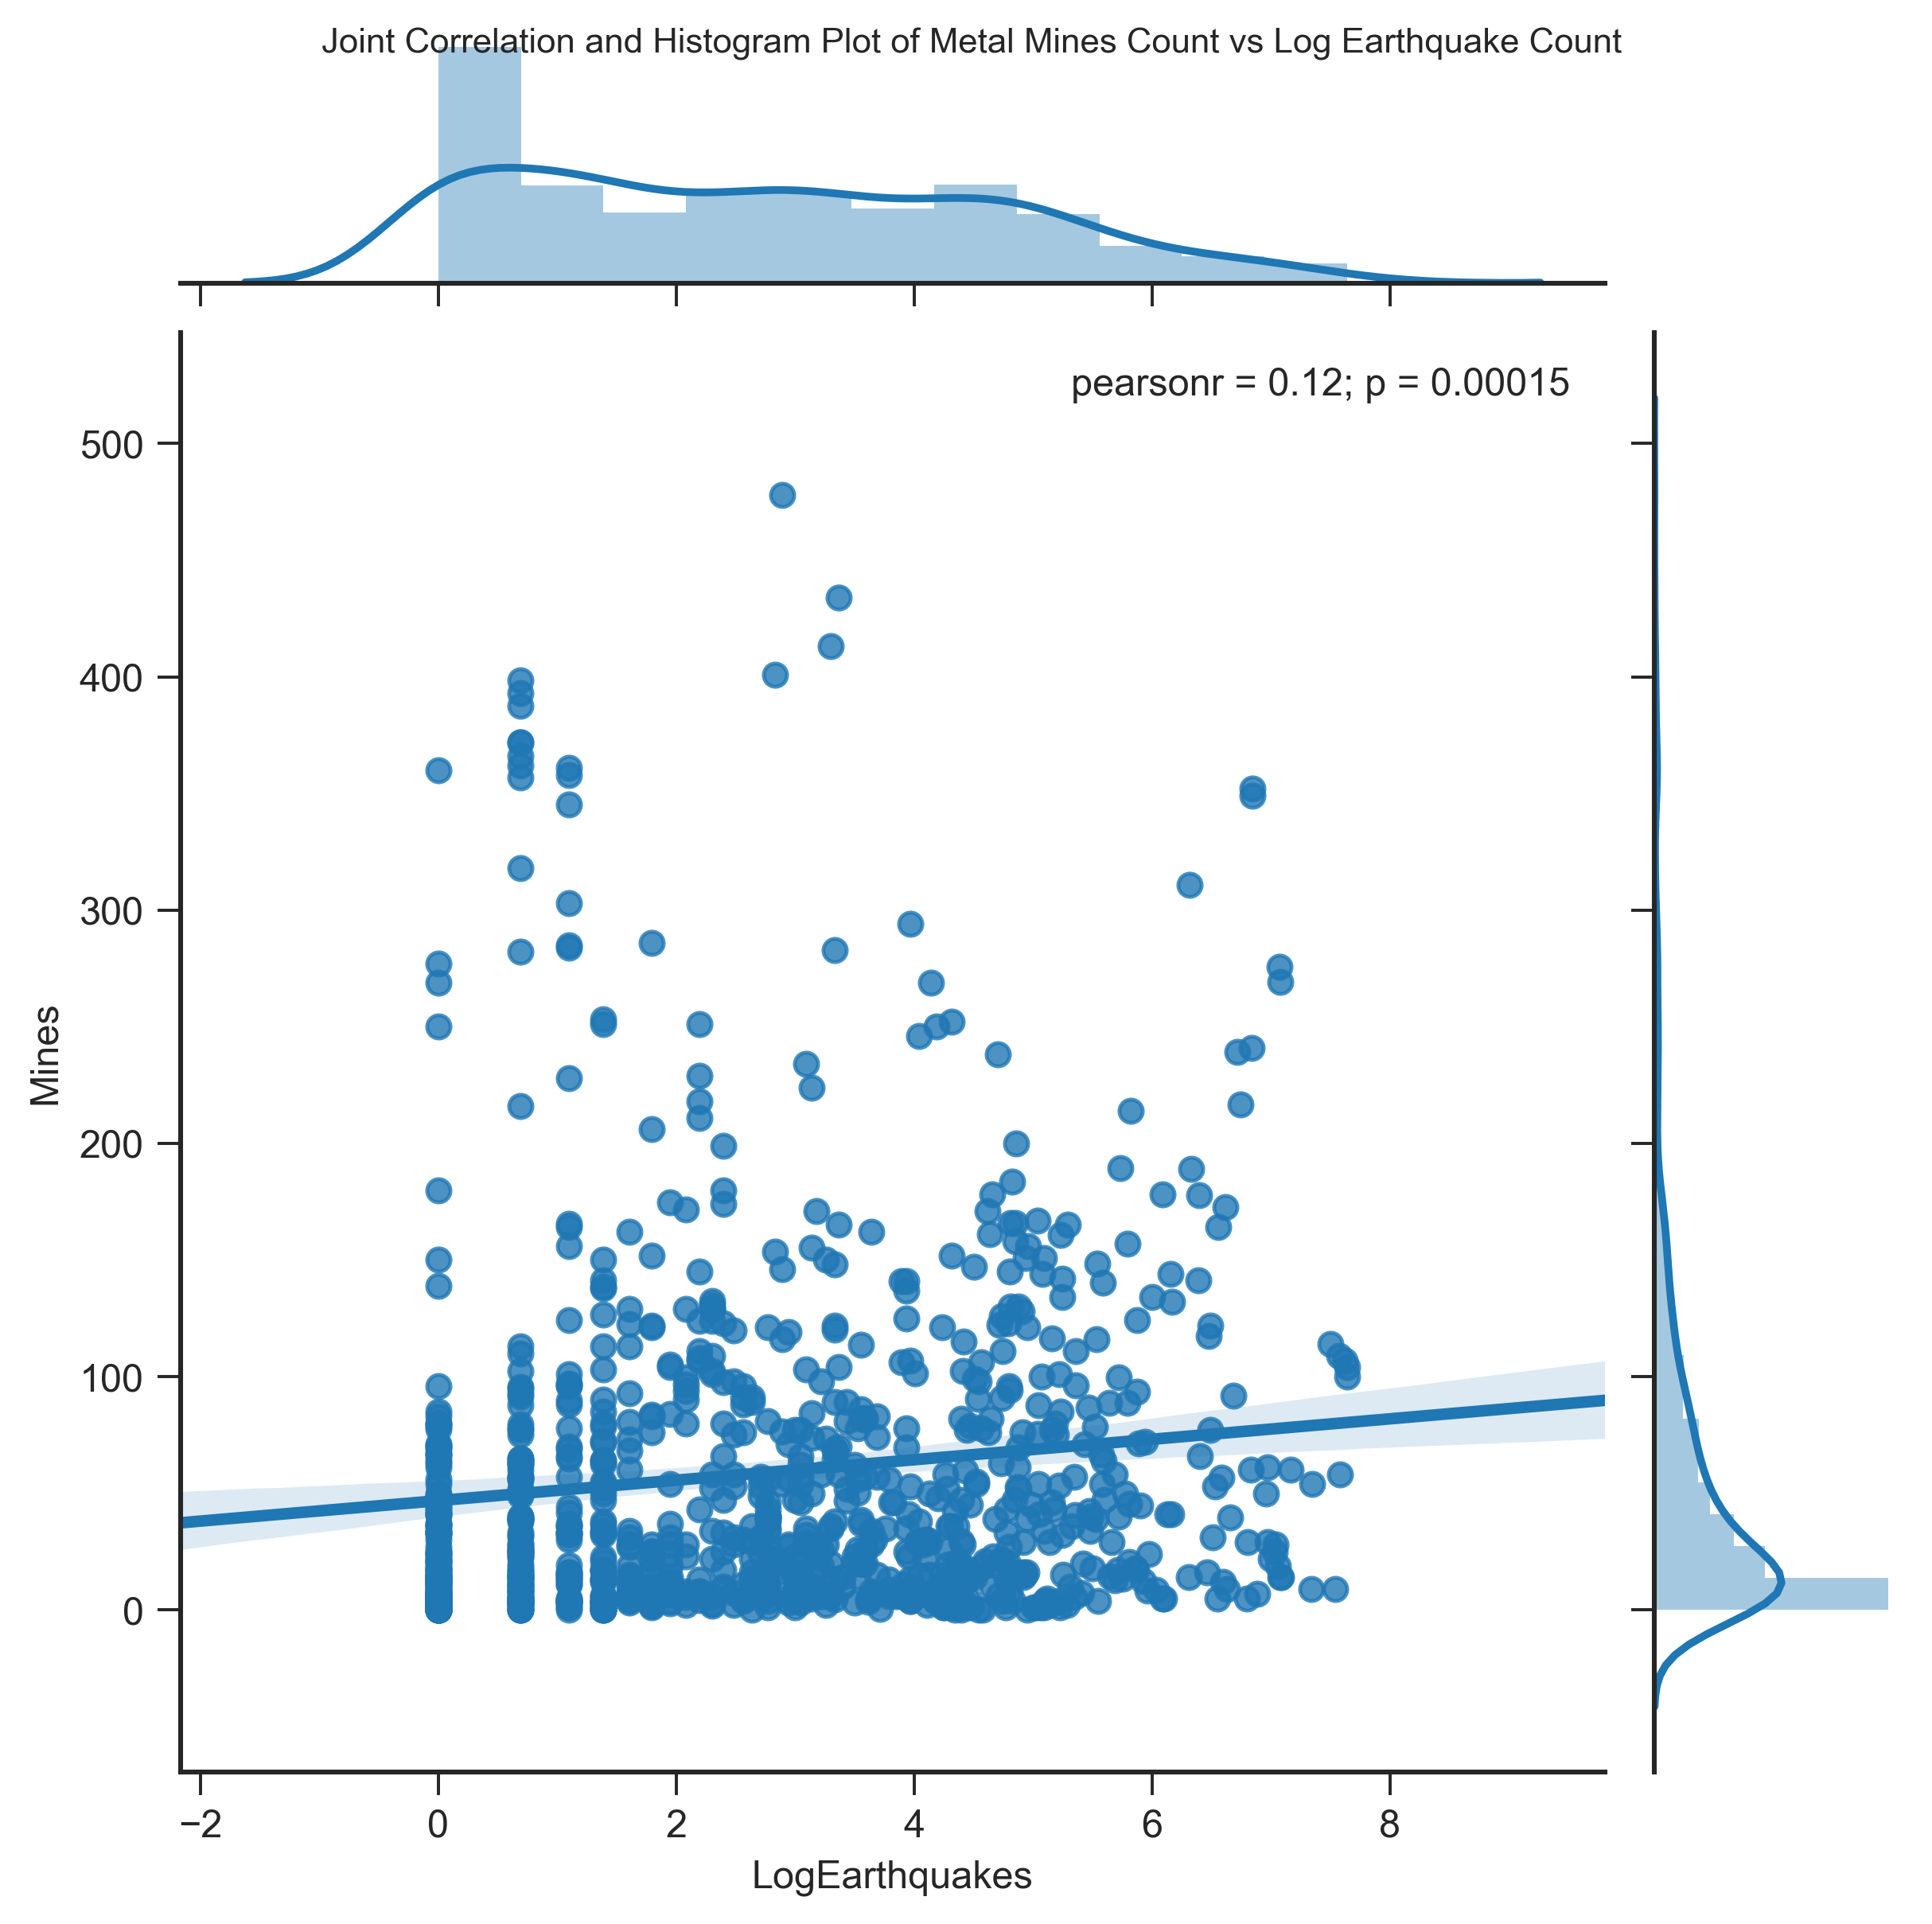

In [17]:
title = 'Joint Correlation and Histogram Plot of Metal Mines Count vs Log Earthquake Count'
correlationPlot(samples, 'LogEarthquakes', 'Mines', title)

The correlation between earthquakes and the count of mines present is quite weak according to the low pearson coefficient.

Next I will look at whether this pattern holds when there are at least some mountains present:

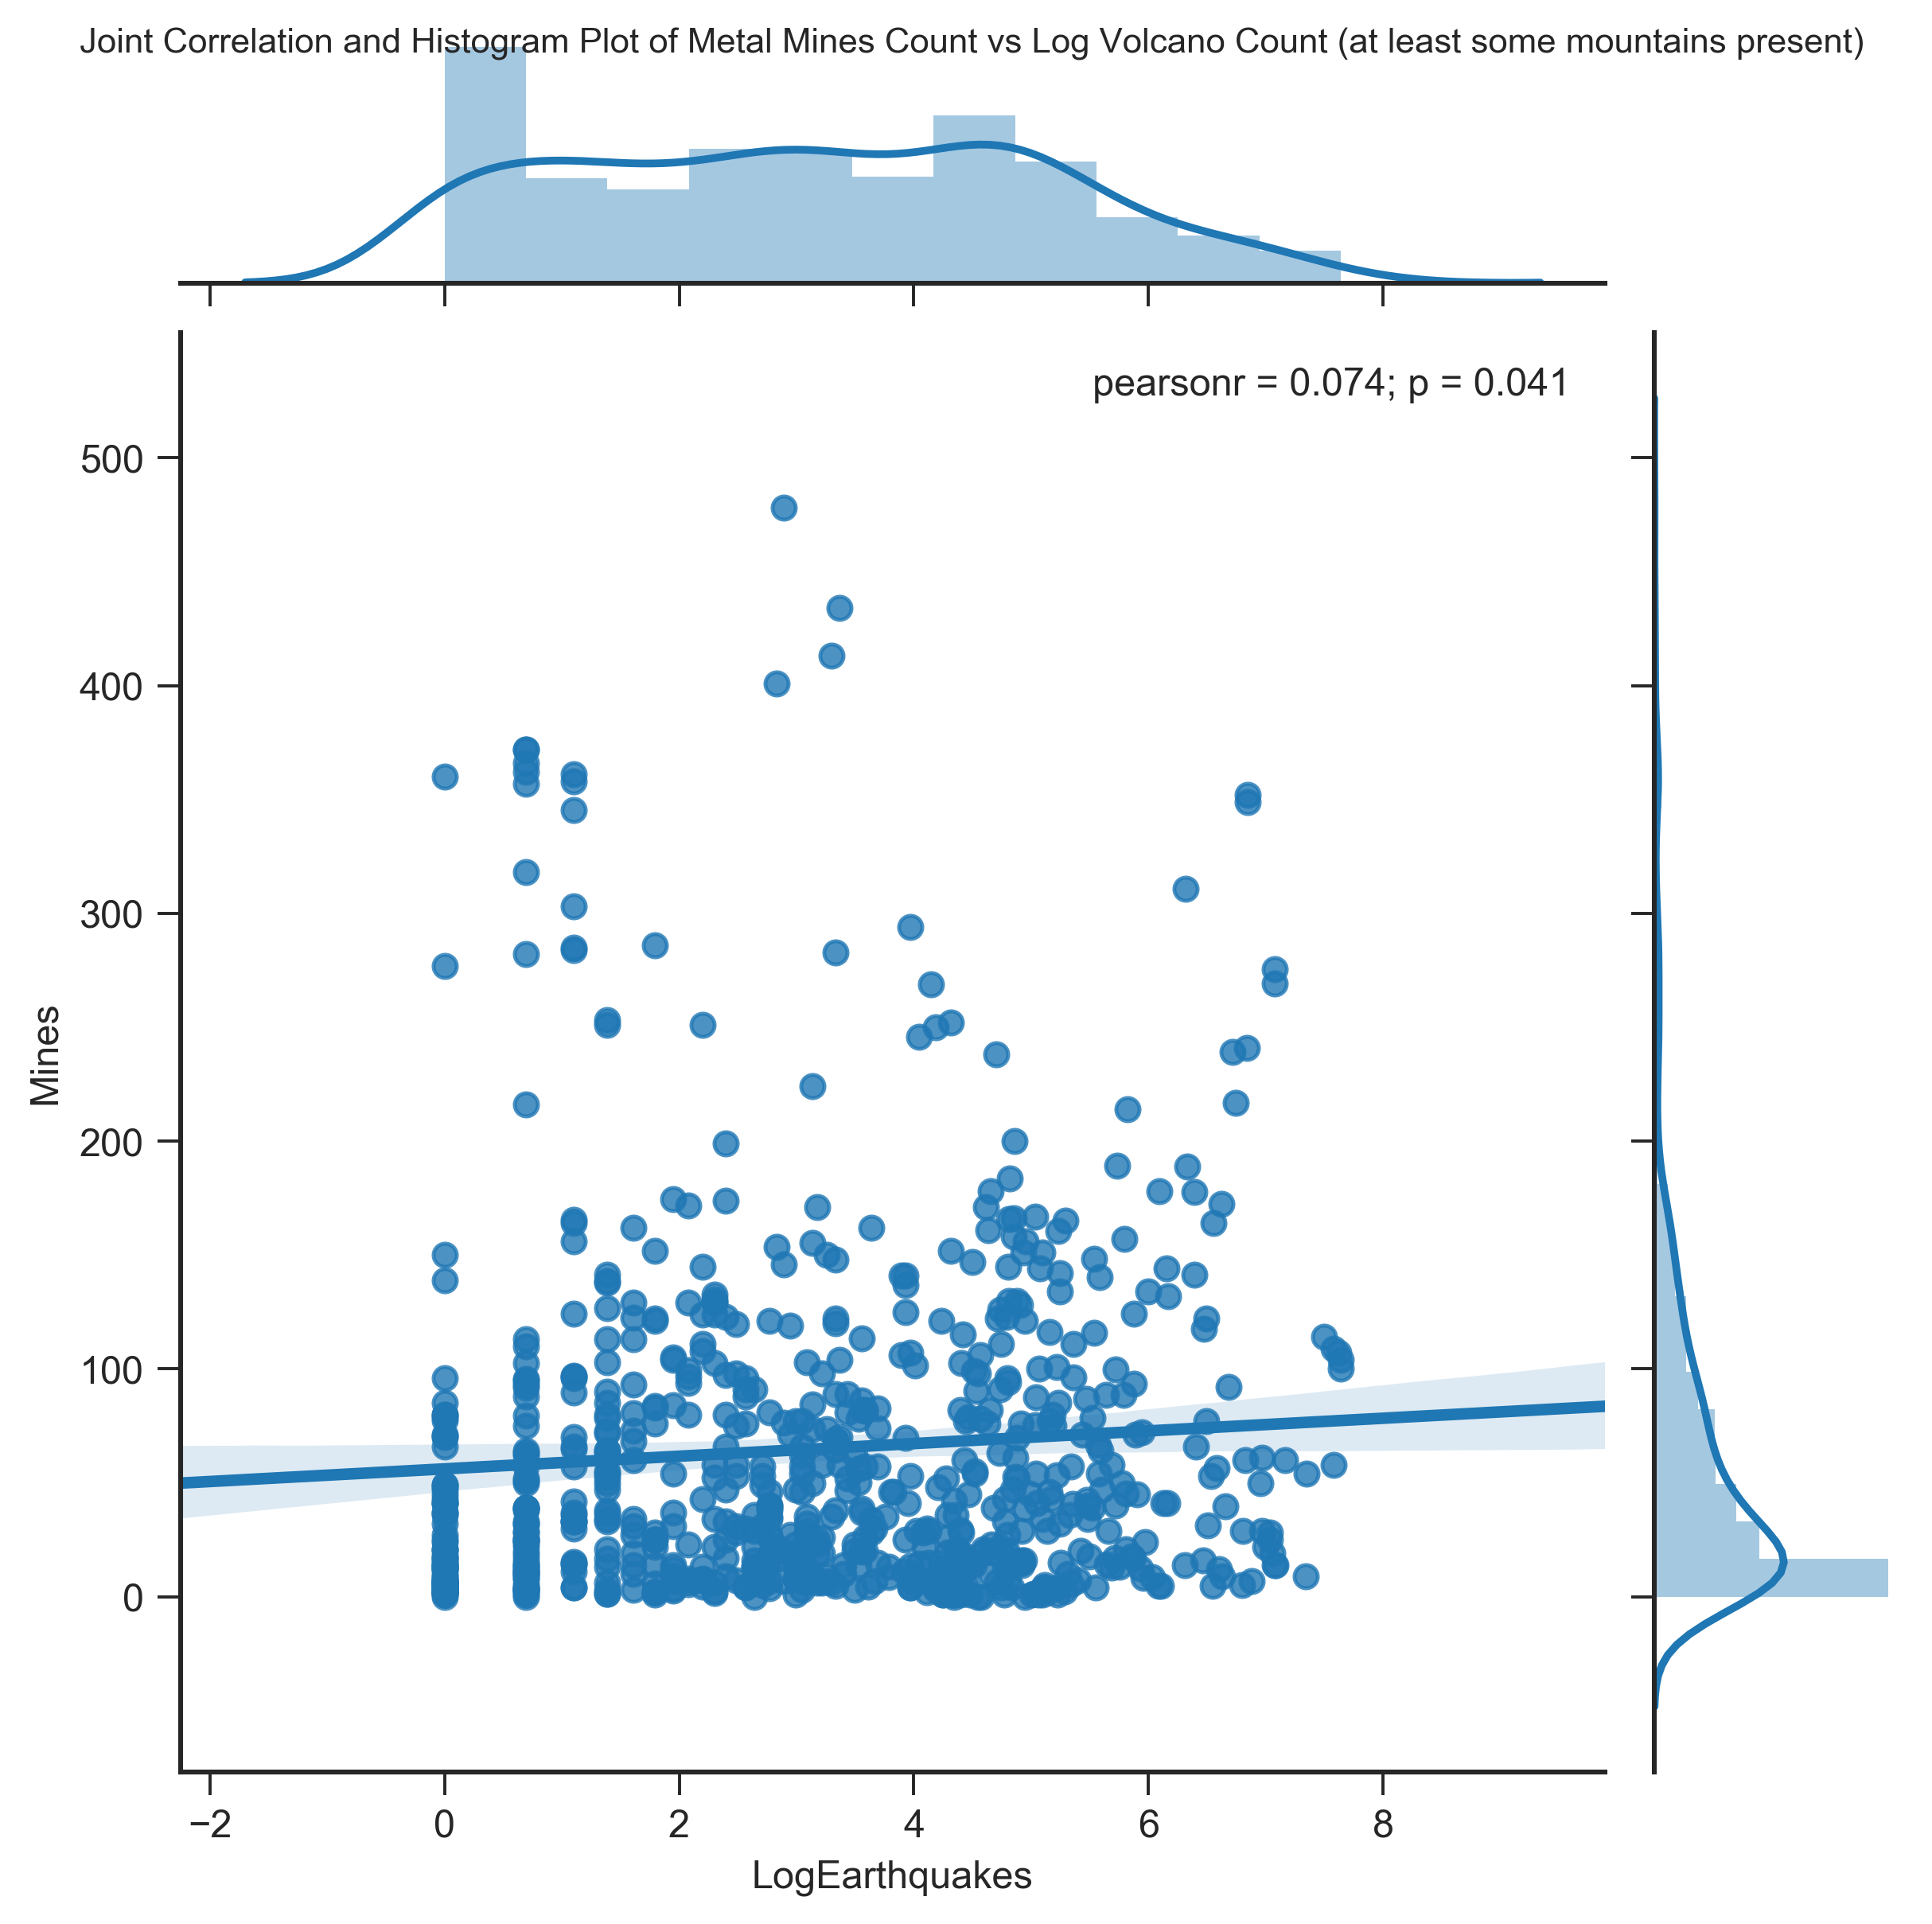

In [18]:
title = 'Joint Correlation and Histogram Plot of Metal Mines Count vs Log Volcano Count (at least some mountains present)'
filtered = samples[samples['MountainPercentage'] > 0]
correlationPlot(filtered, 'LogEarthquakes', 'Mines', title)

The strength of the correlation is similar in the case where there are at least some mountains present.

What about when there has been at least one earthquake in the region in the past 40 years?

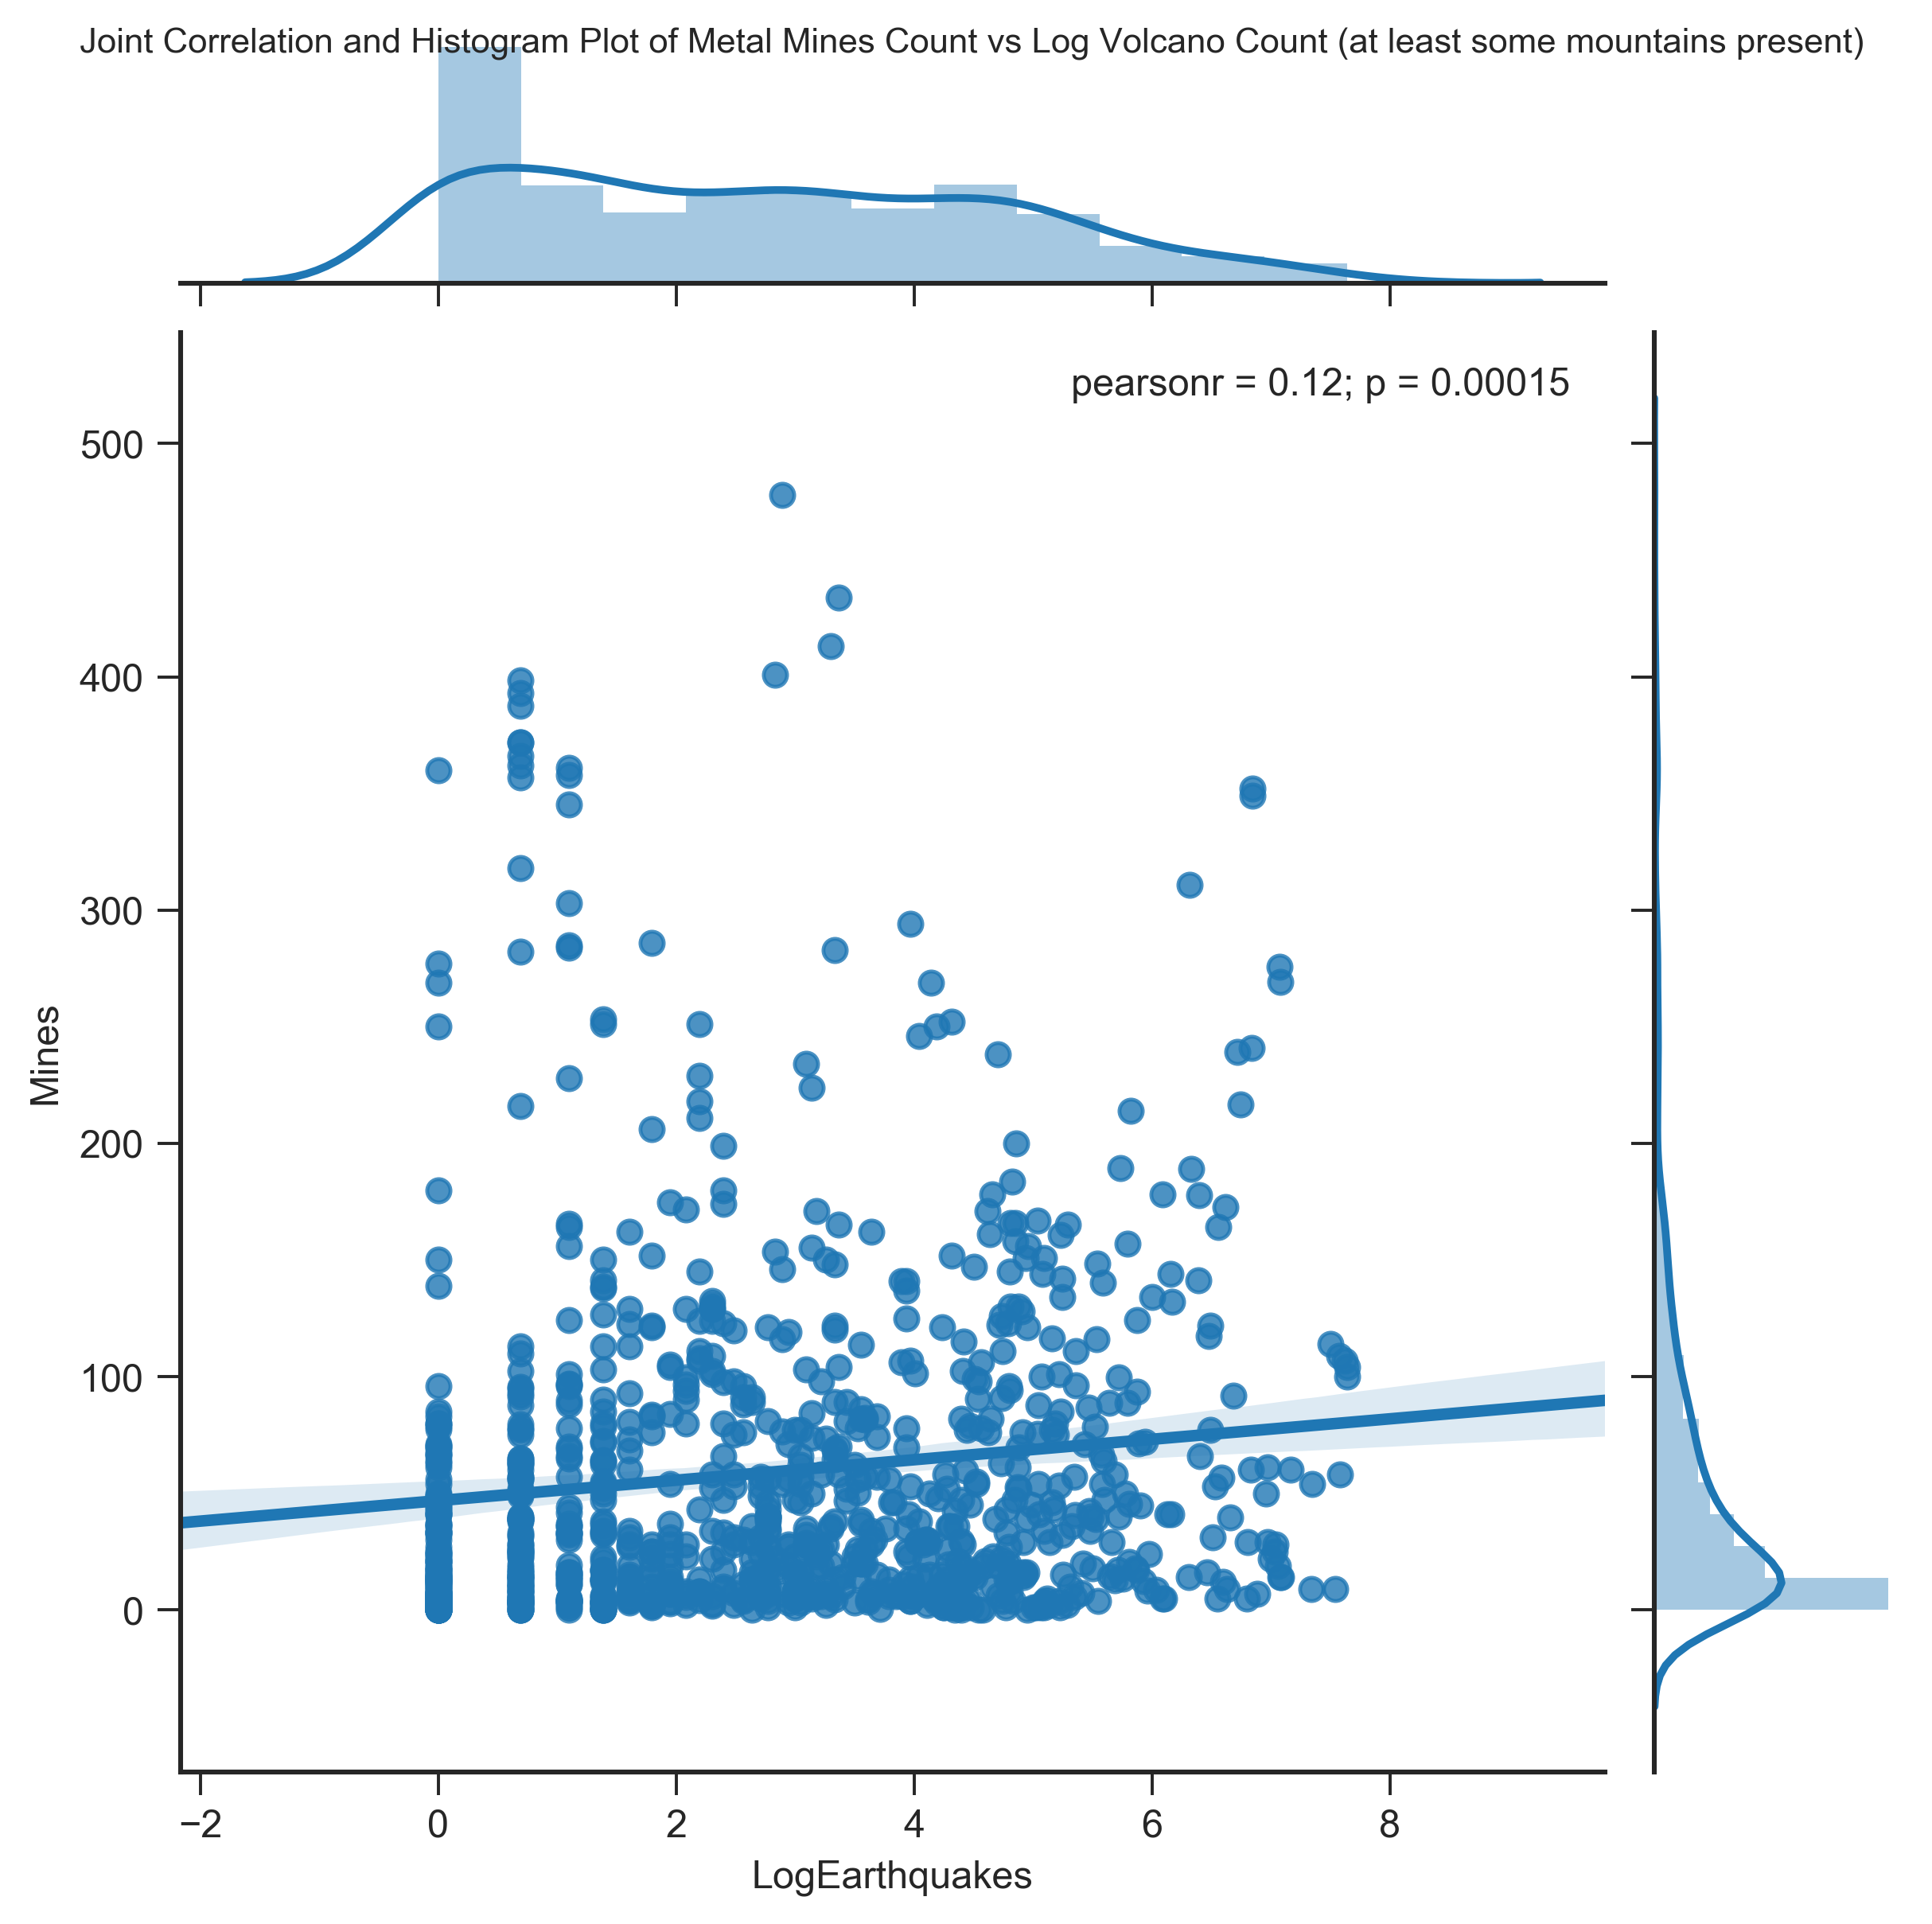

In [19]:
title = 'Joint Correlation and Histogram Plot of Metal Mines Count vs Log Volcano Count (at least some mountains present)'
filtered = samples[samples['Earthquakes'] > 0]
correlationPlot(filtered, 'LogEarthquakes', 'Mines', title)

According to this graph, the strength of the correlation with some mountains present is identical to the when all samples are being examined.

What about in the situation where there are many mountains in the area?

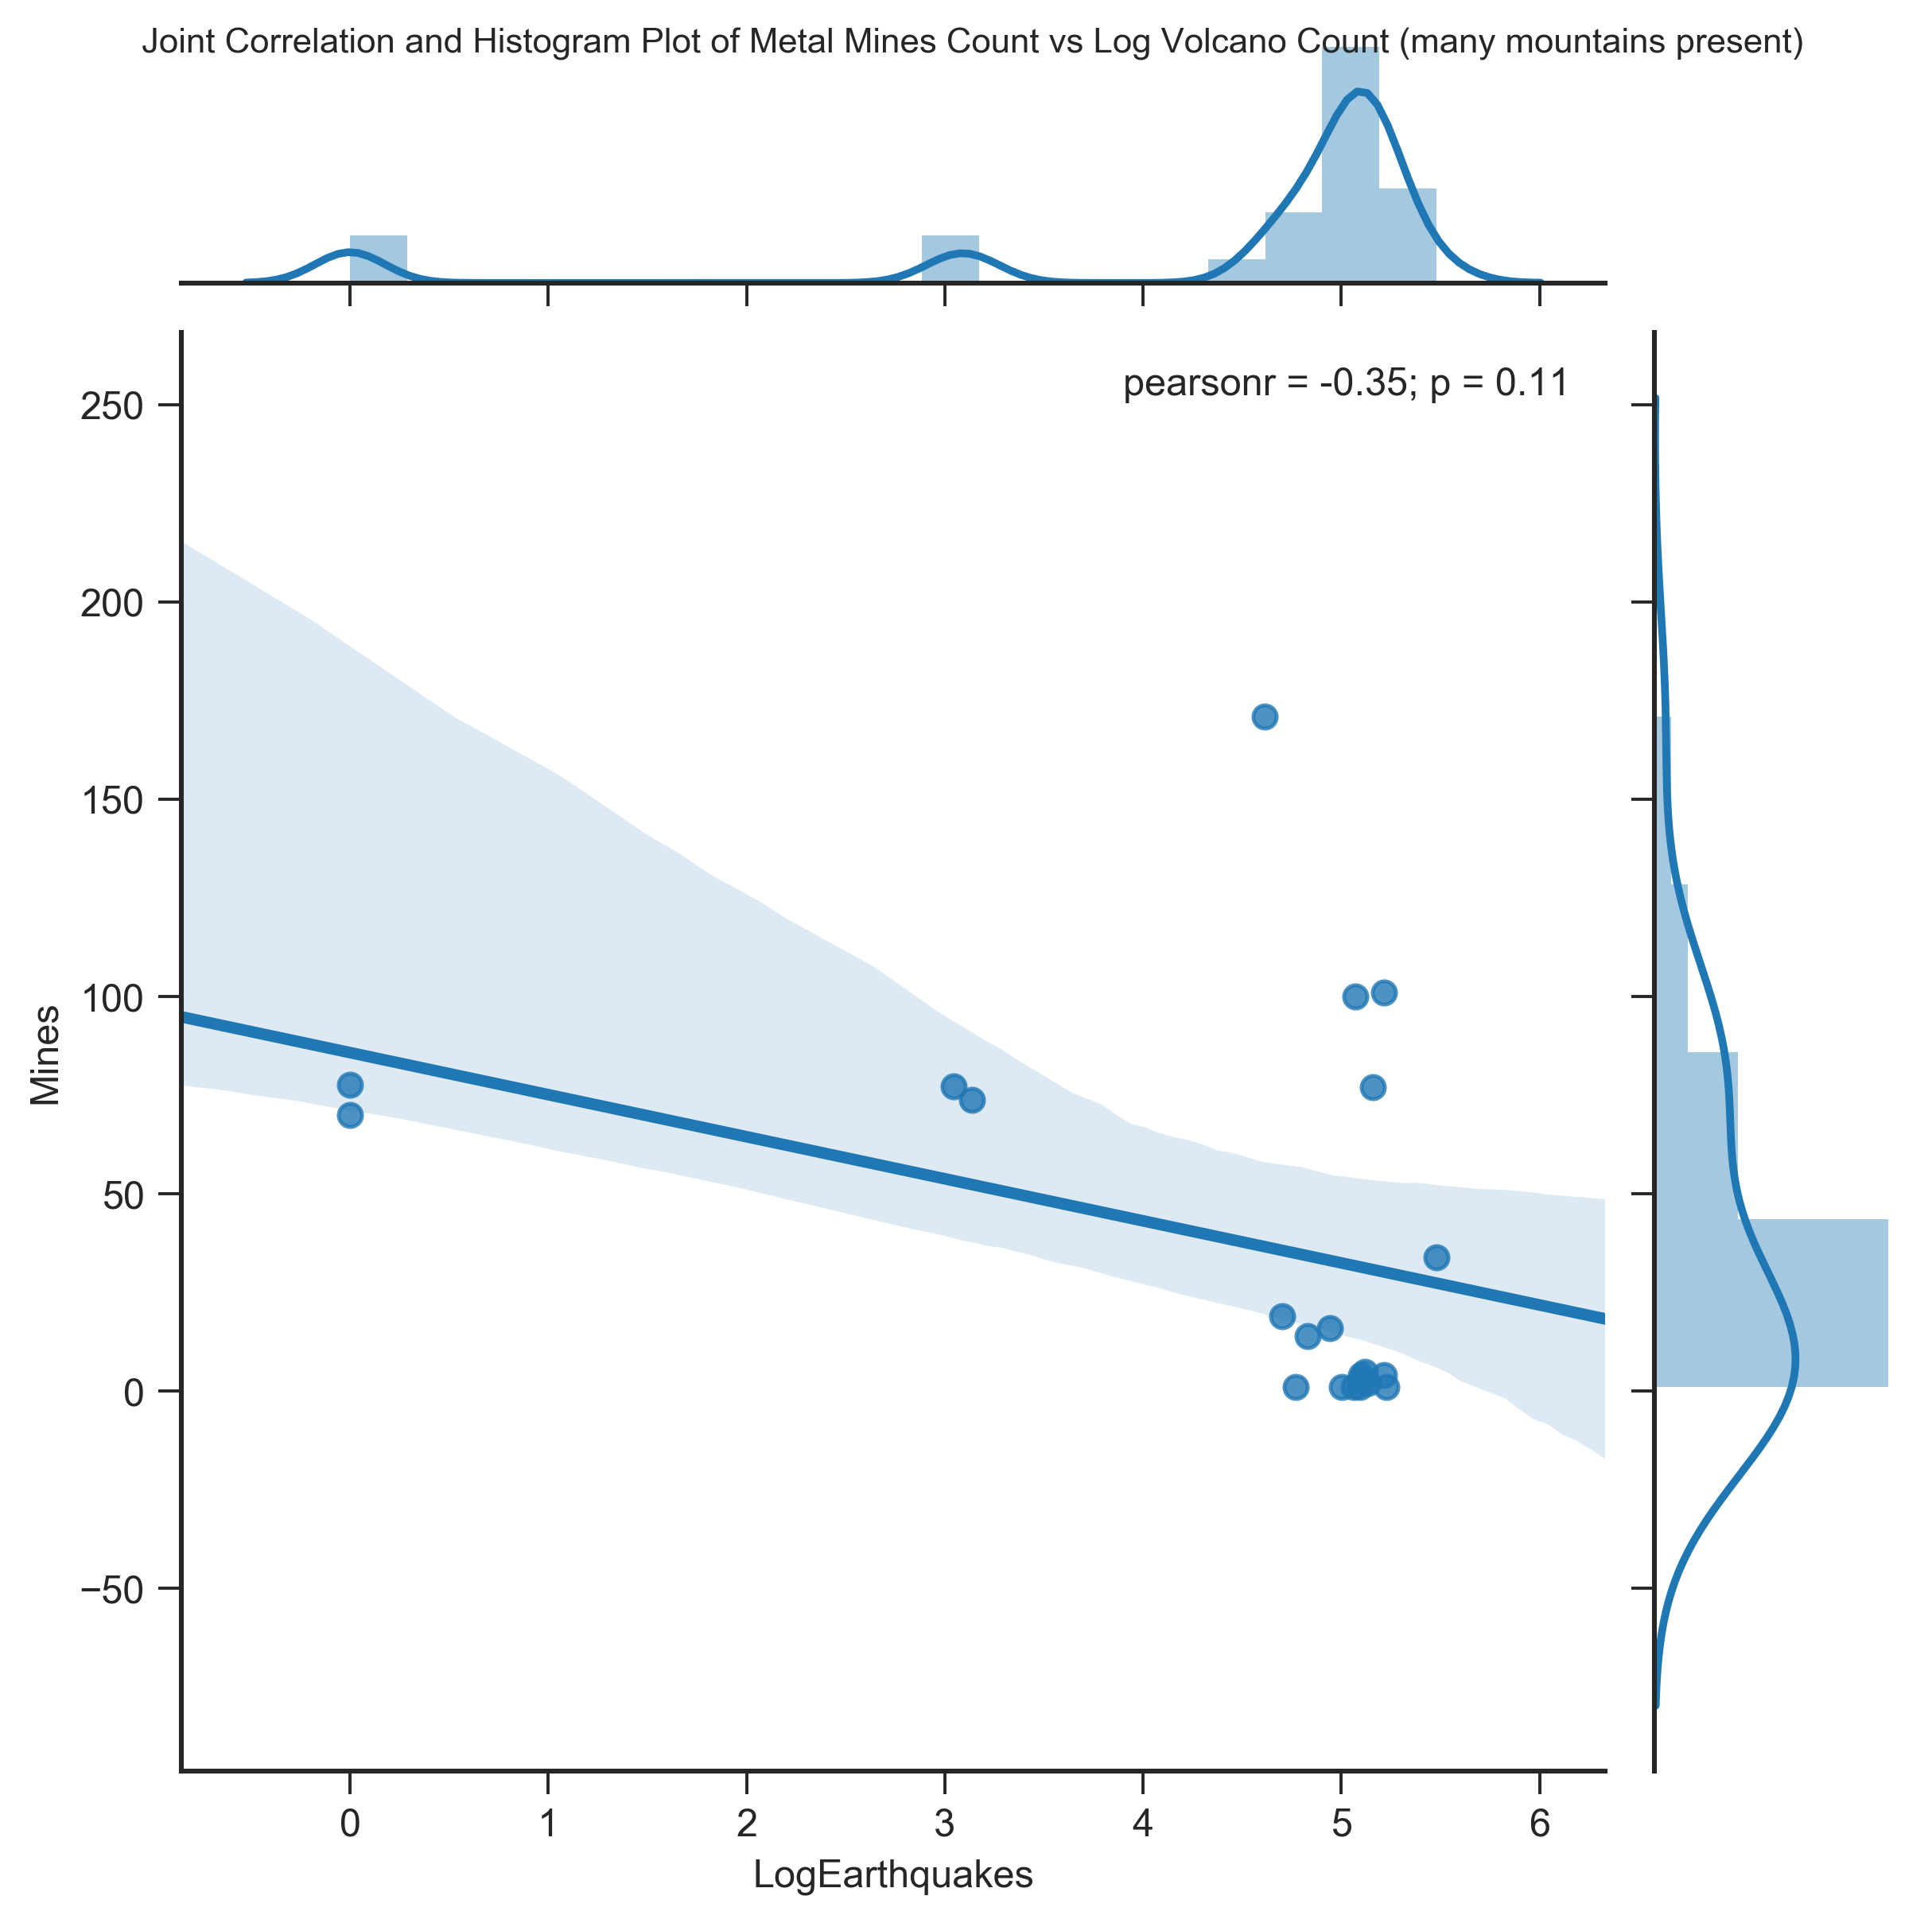

In [20]:
title = 'Joint Correlation and Histogram Plot of Metal Mines Count vs Log Volcano Count (many mountains present)'
filtered = samples[samples['MountainPercentage'] > 80]
correlationPlot(filtered, 'LogEarthquakes', 'Mines', title)

According to this graph and the pearson coefficient of -0.35, the strength of this negative correlation of log earthquake count to Mine count is moderately clear. However, again this relates to only 22 samples out of the full set, so it is probably not realistic.

<a name="MountainPredictors"></a>
### Mountains As Predictors

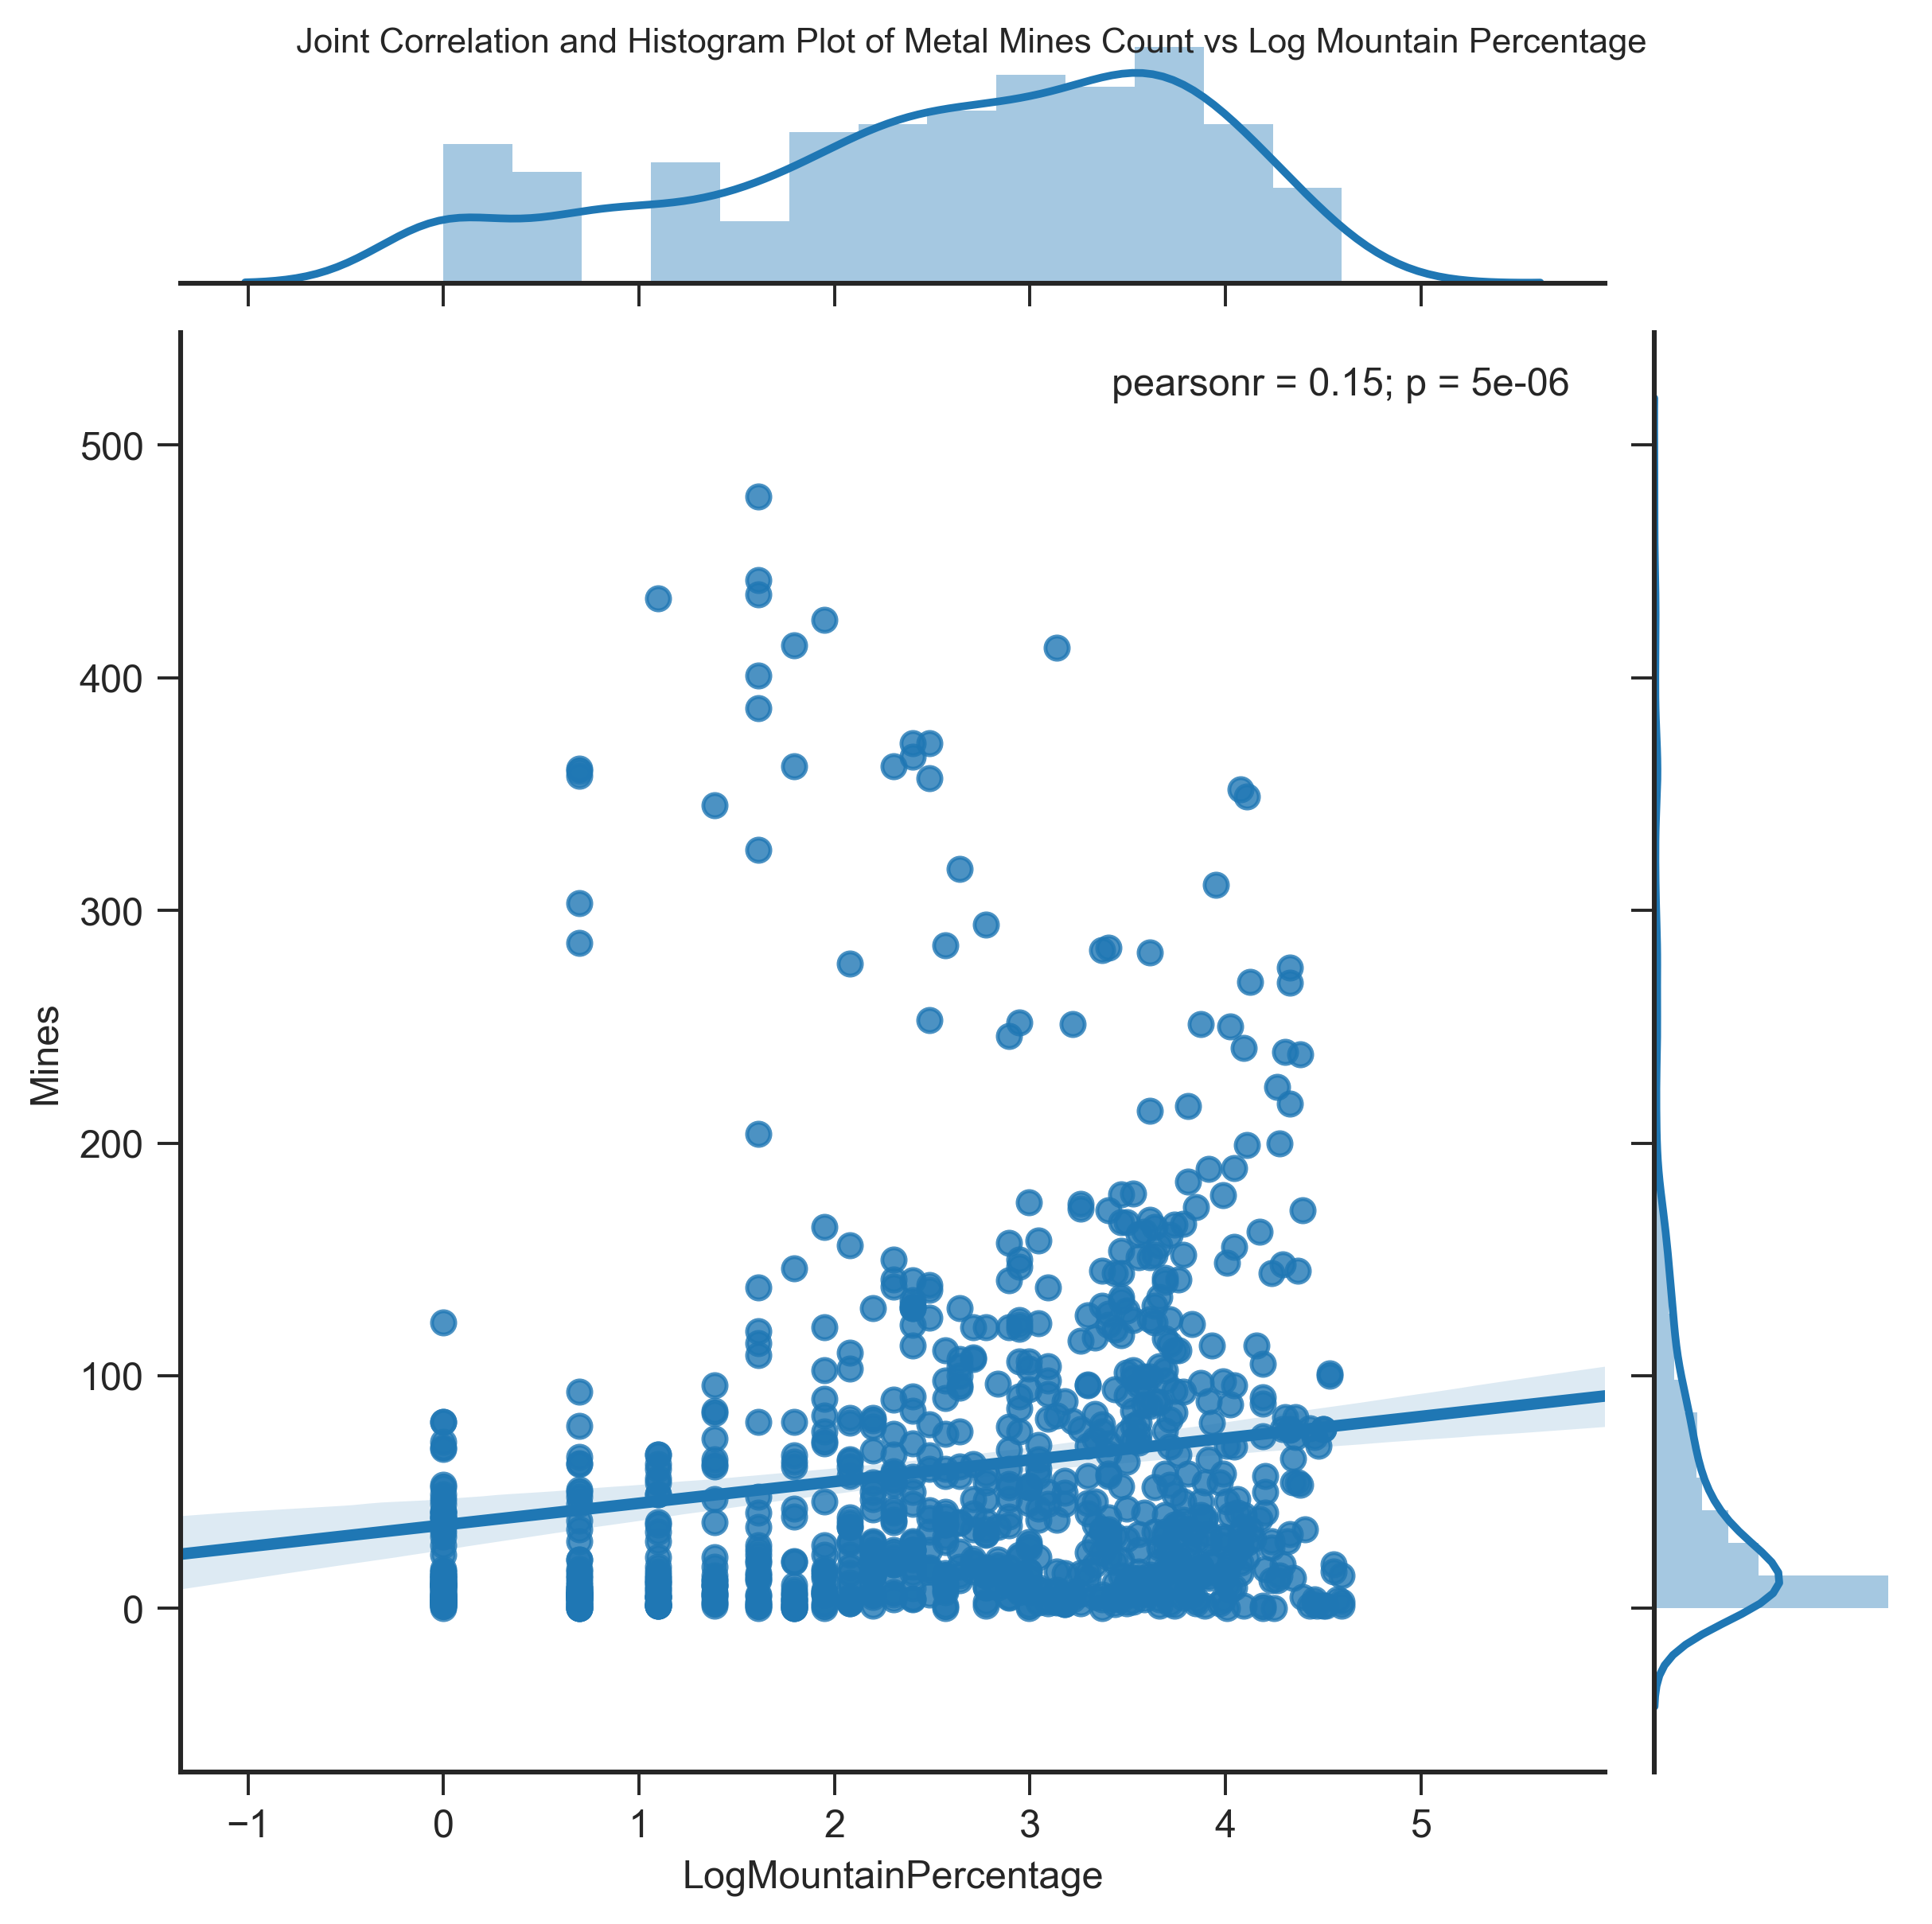

In [21]:
title = 'Joint Correlation and Histogram Plot of Metal Mines Count vs Log Mountain Percentage'
correlationPlot(samples, 'LogMountainPercentage', 'Mines', title)

The correlation between the presence of mountains and the count of mines present is weak according to the pearson coefficient of 0.15 and the low p-value.

Next I will look at whether this pattern holds when there are at least some mountains present:

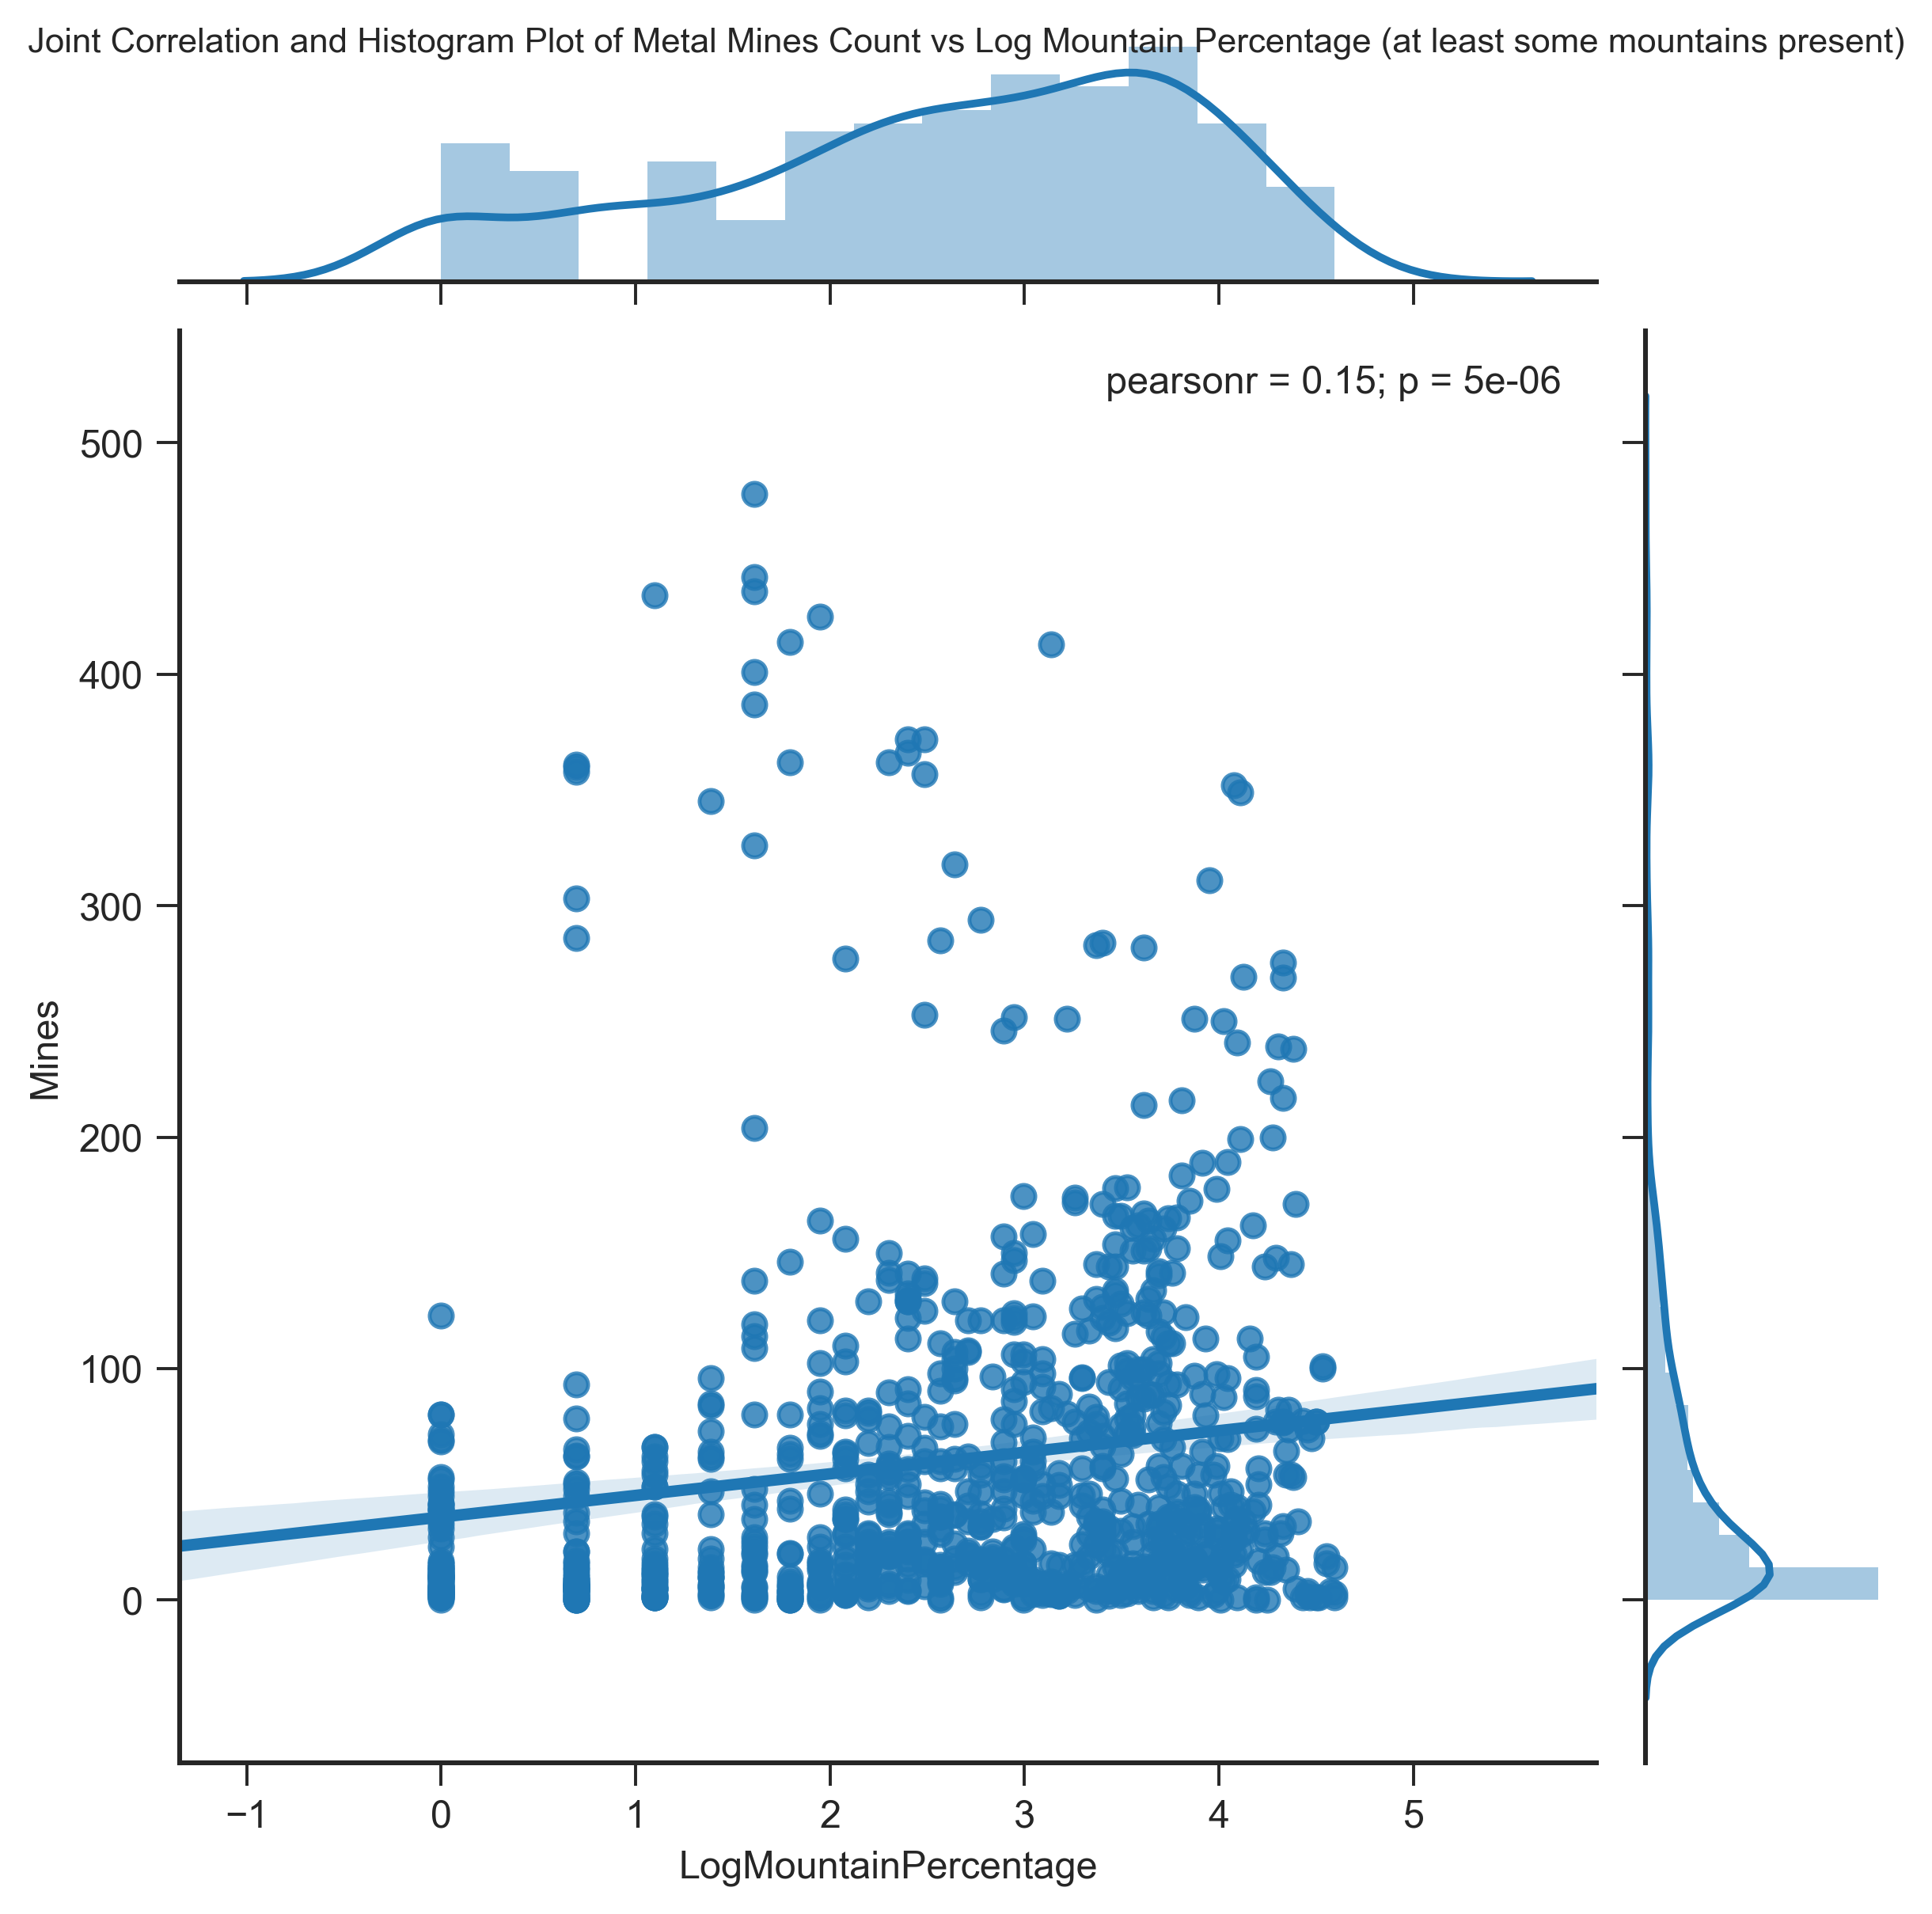

In [22]:
title = 'Joint Correlation and Histogram Plot of Metal Mines Count vs Log Mountain Percentage (at least some mountains present)'
filtered = samples[samples['MountainPercentage'] > 0]
correlationPlot(filtered, 'LogMountainPercentage', 'Mines', title)

The strength of the correlation is identical in the case where there are at least some mountains present.

<a name="TectonicPredictors"></a>
### Single Tectonic Features As Predictors

It is clear from the analysis above that all three of the tectonic predictors some use as predictors of the presence of mines on their own, but many of them are quite weak as predictors. This pattern holds true even for mountains, which do not necessarily involve tectonic geological settings that are still active.

It may be possible to get even stronger predictions using a multivariate model combining these variables. In order to see if this is worthwhile, however, it is first necessary to test the degree to which they can be correlated with each other. My suspicion based on my study of the map distribution of these features is that each can be present in the overlapping areas, but this is not always the case, so a model that combines all three predictors should, in theory, cover for situations when one of the variables is stonger as a predictor in an area than the other two. 

<a name="CorrelationEarthquakesVolcanoes"></a>
### Correlation of Earthquakes With Volcanoes

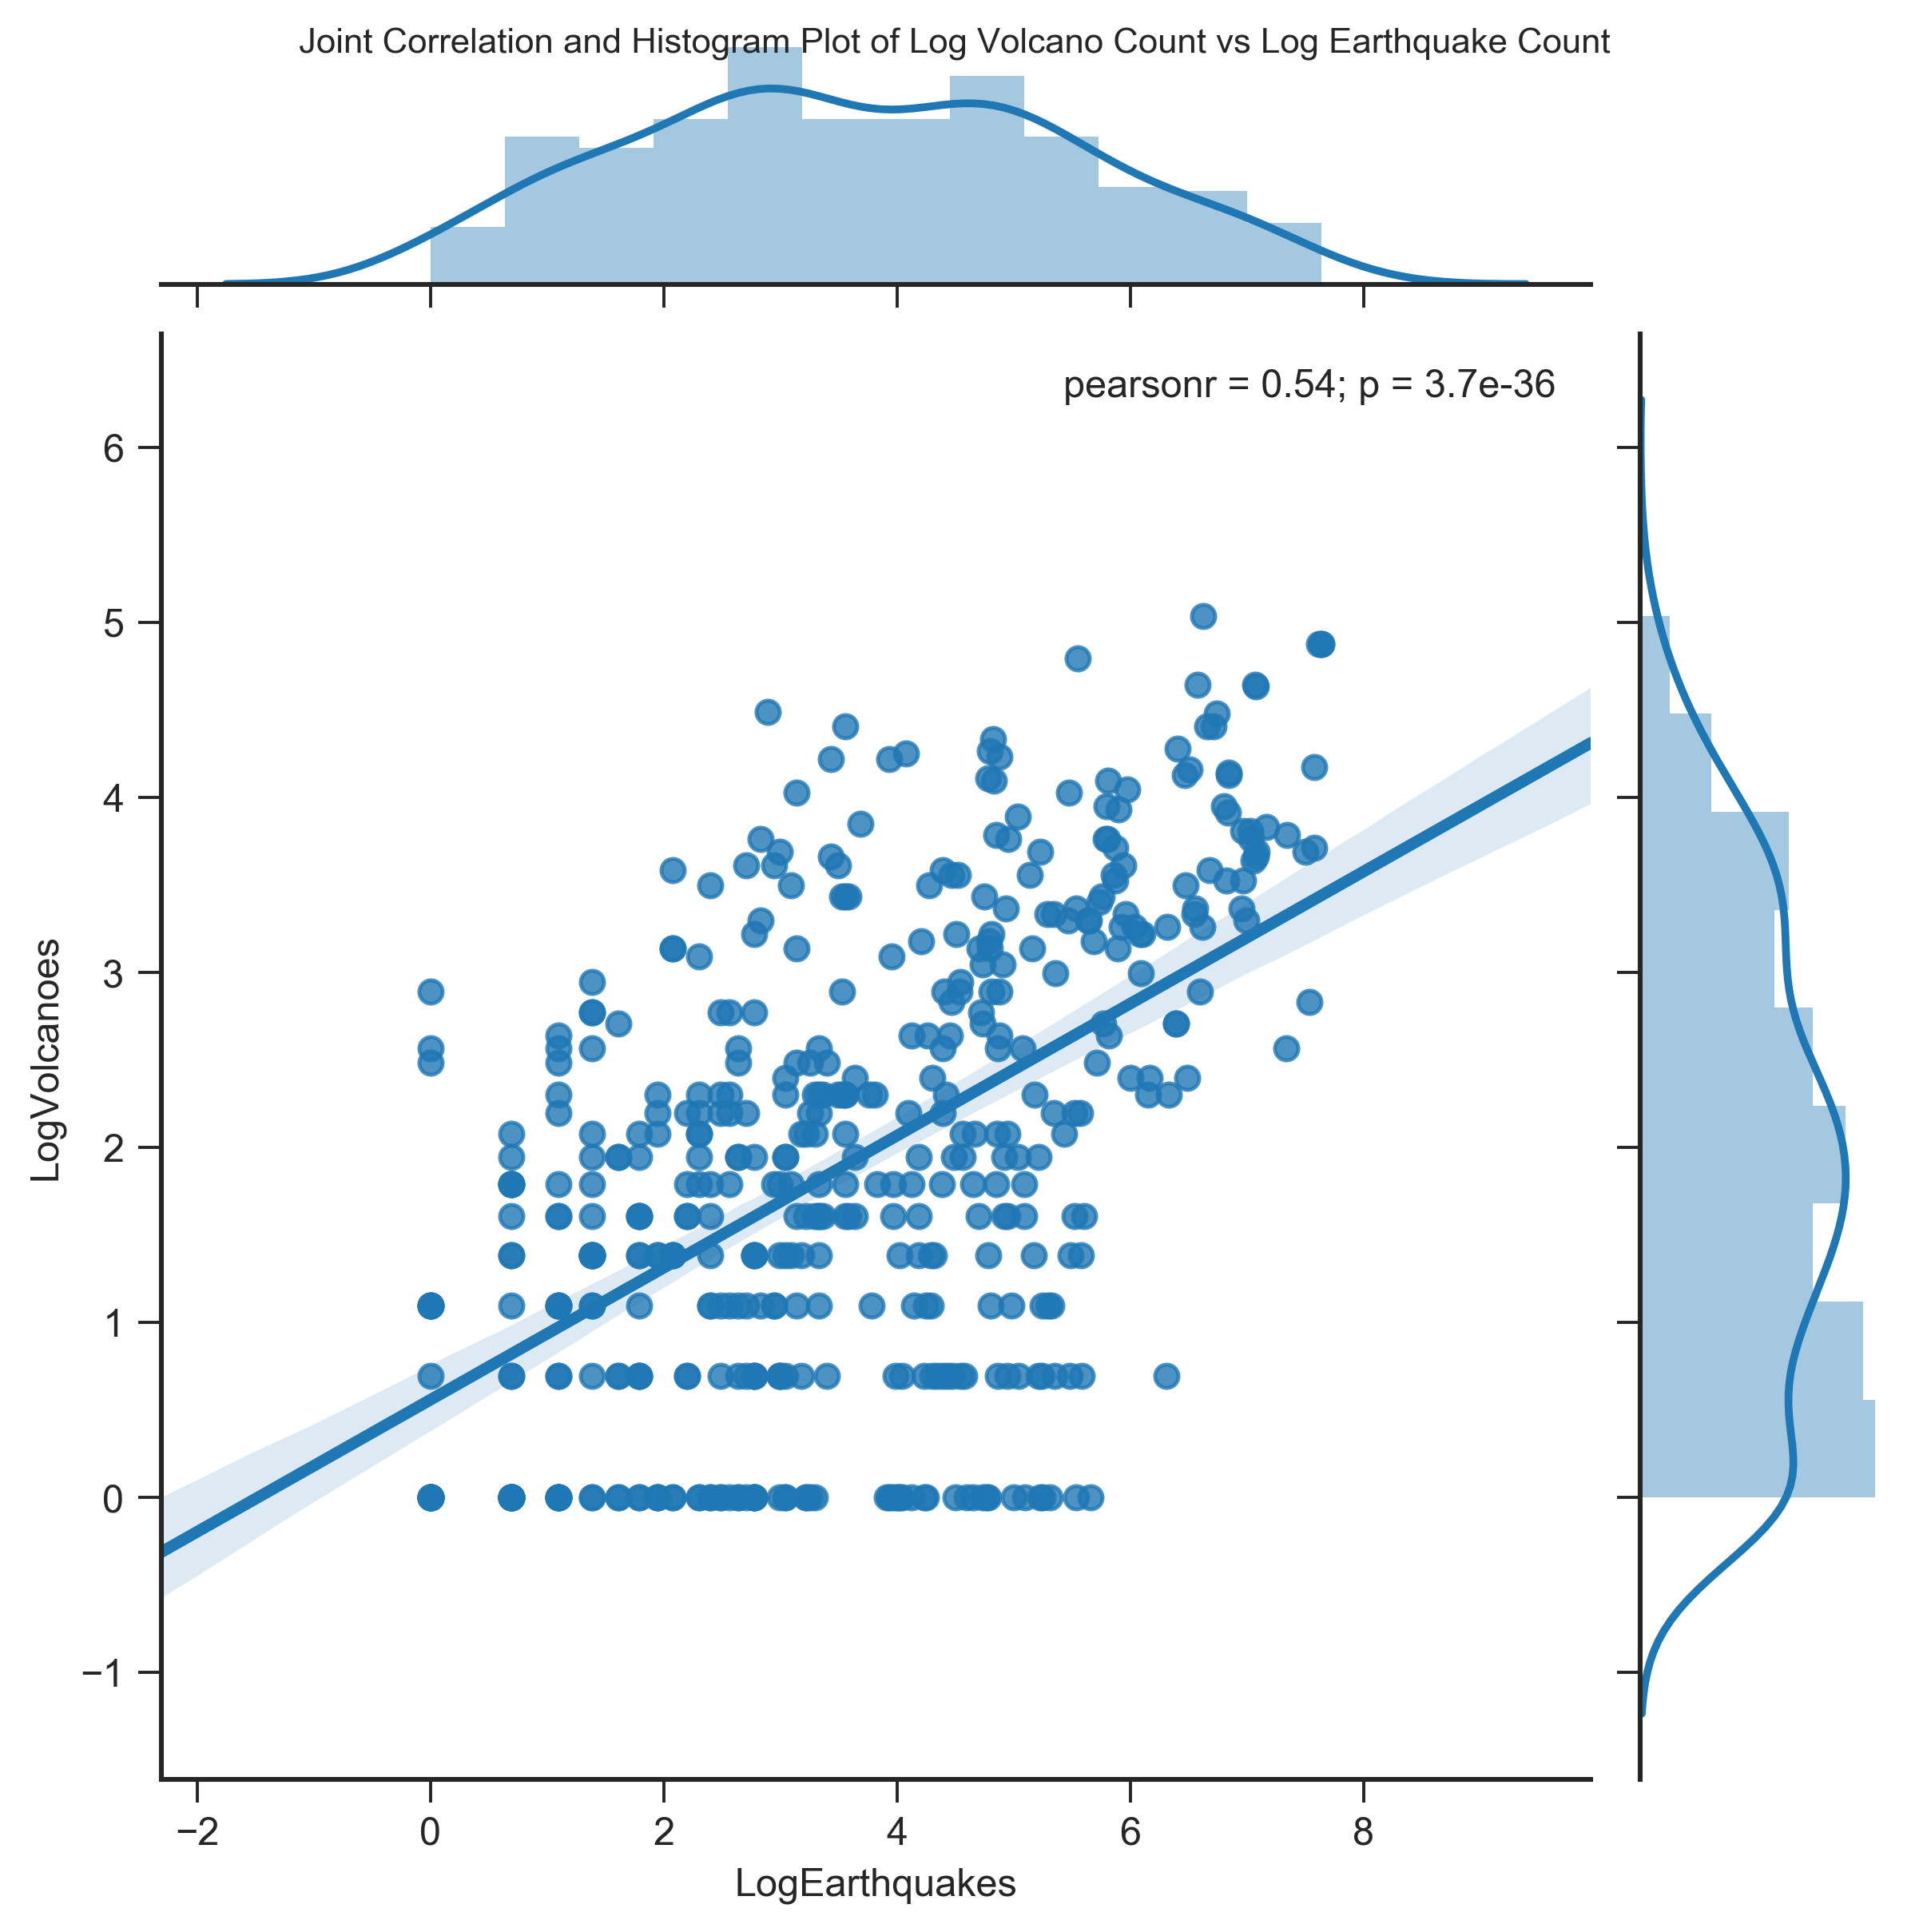

In [23]:
title = 'Joint Correlation and Histogram Plot of Log Volcano Count vs Log Earthquake Count'
correlationPlot(samples, 'LogEarthquakes', 'LogVolcanoes', title)

It appears the correlation between LogEarthquake count and LogVolcanoes count is quite strong. It may not be useful to combine earthquakes and volcanoes in the same model as predictors then. However, the pearson coefficient is only 0.5. The remaining 0.5 might be explainable by the fact that earthquakes occur in some areas where volcanoes do not, and vice-versa.

<a name="CorrelationEarthquakesMountains"></a>
### Correlation of Earthquakes With Mountains

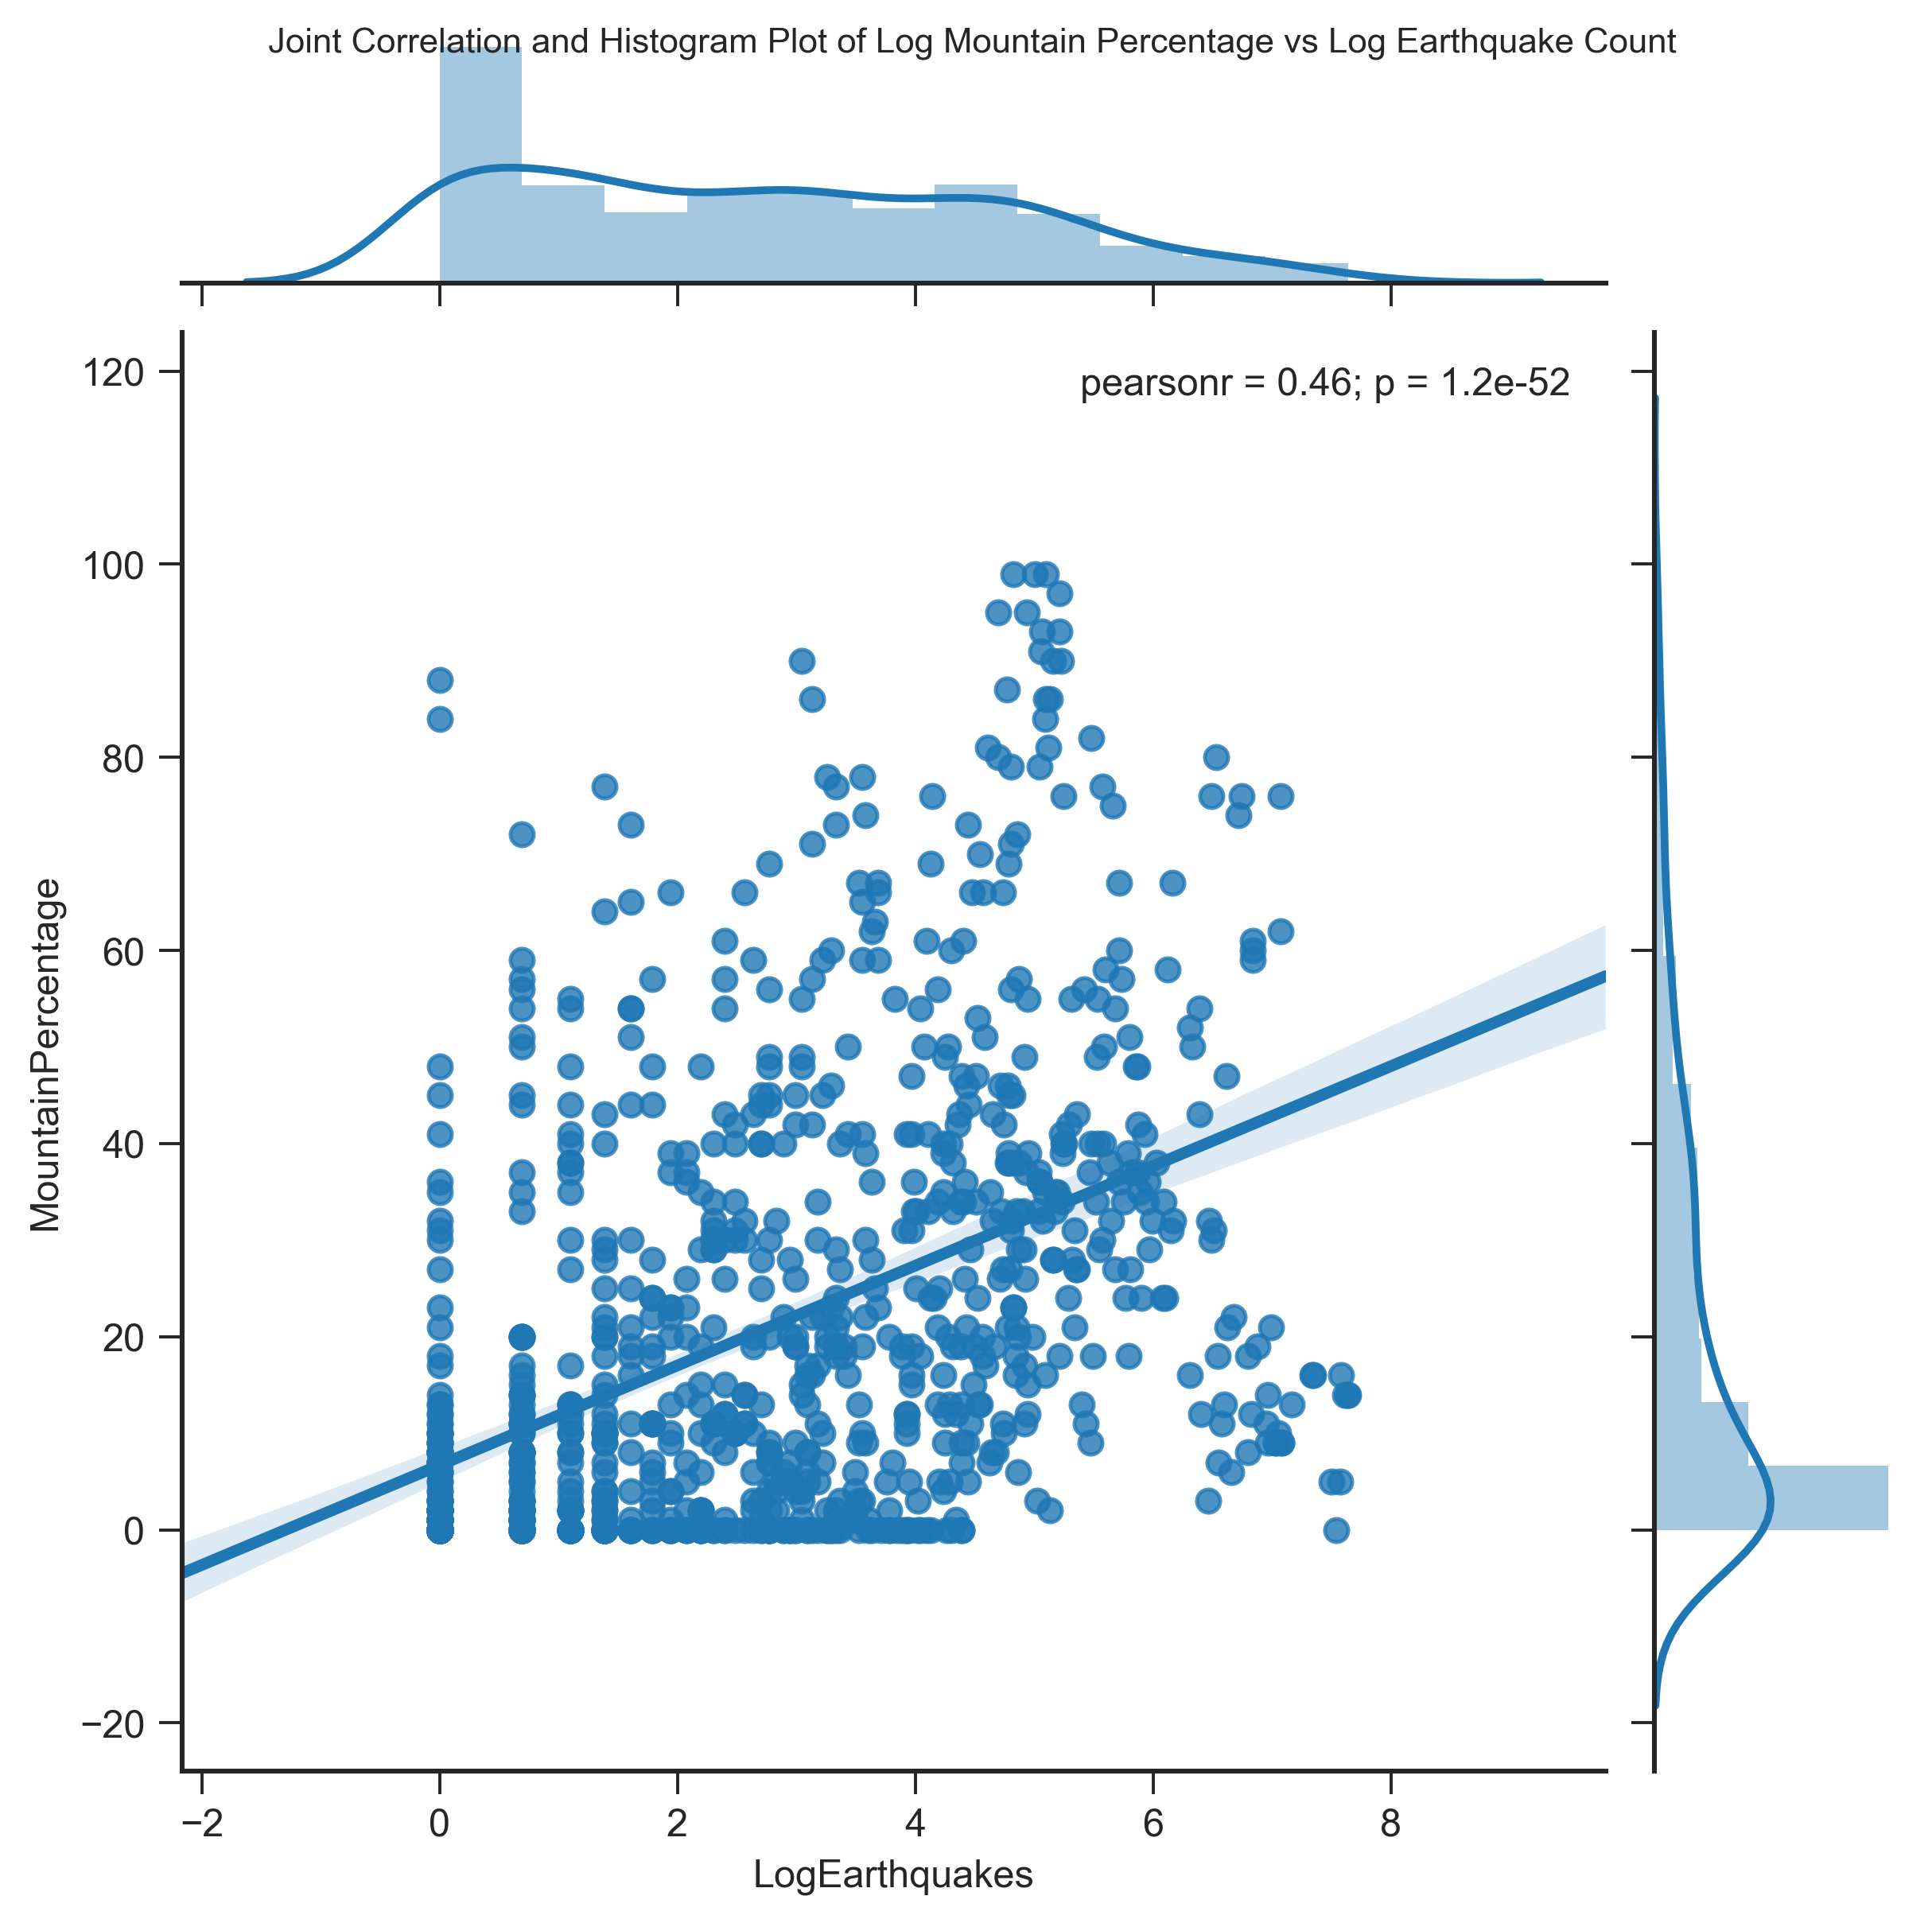

In [24]:
title = 'Joint Correlation and Histogram Plot of Log Mountain Percentage vs Log Earthquake Count'
correlationPlot(samples, 'LogEarthquakes', 'MountainPercentage', title)

It appears the correlation between LogEarthquake count and LogMountainPercentage is quite high with a pearson coefficient 0.46. It is not near 1.0, however, but earthquakes occur in some areas where there are no mountains present, and vice-versa, so again probably explains why the correlation is not absolute.

<a name="CorrelationVolcanoesMountains"></a>
### Correlation of Volcanoes With Mountains

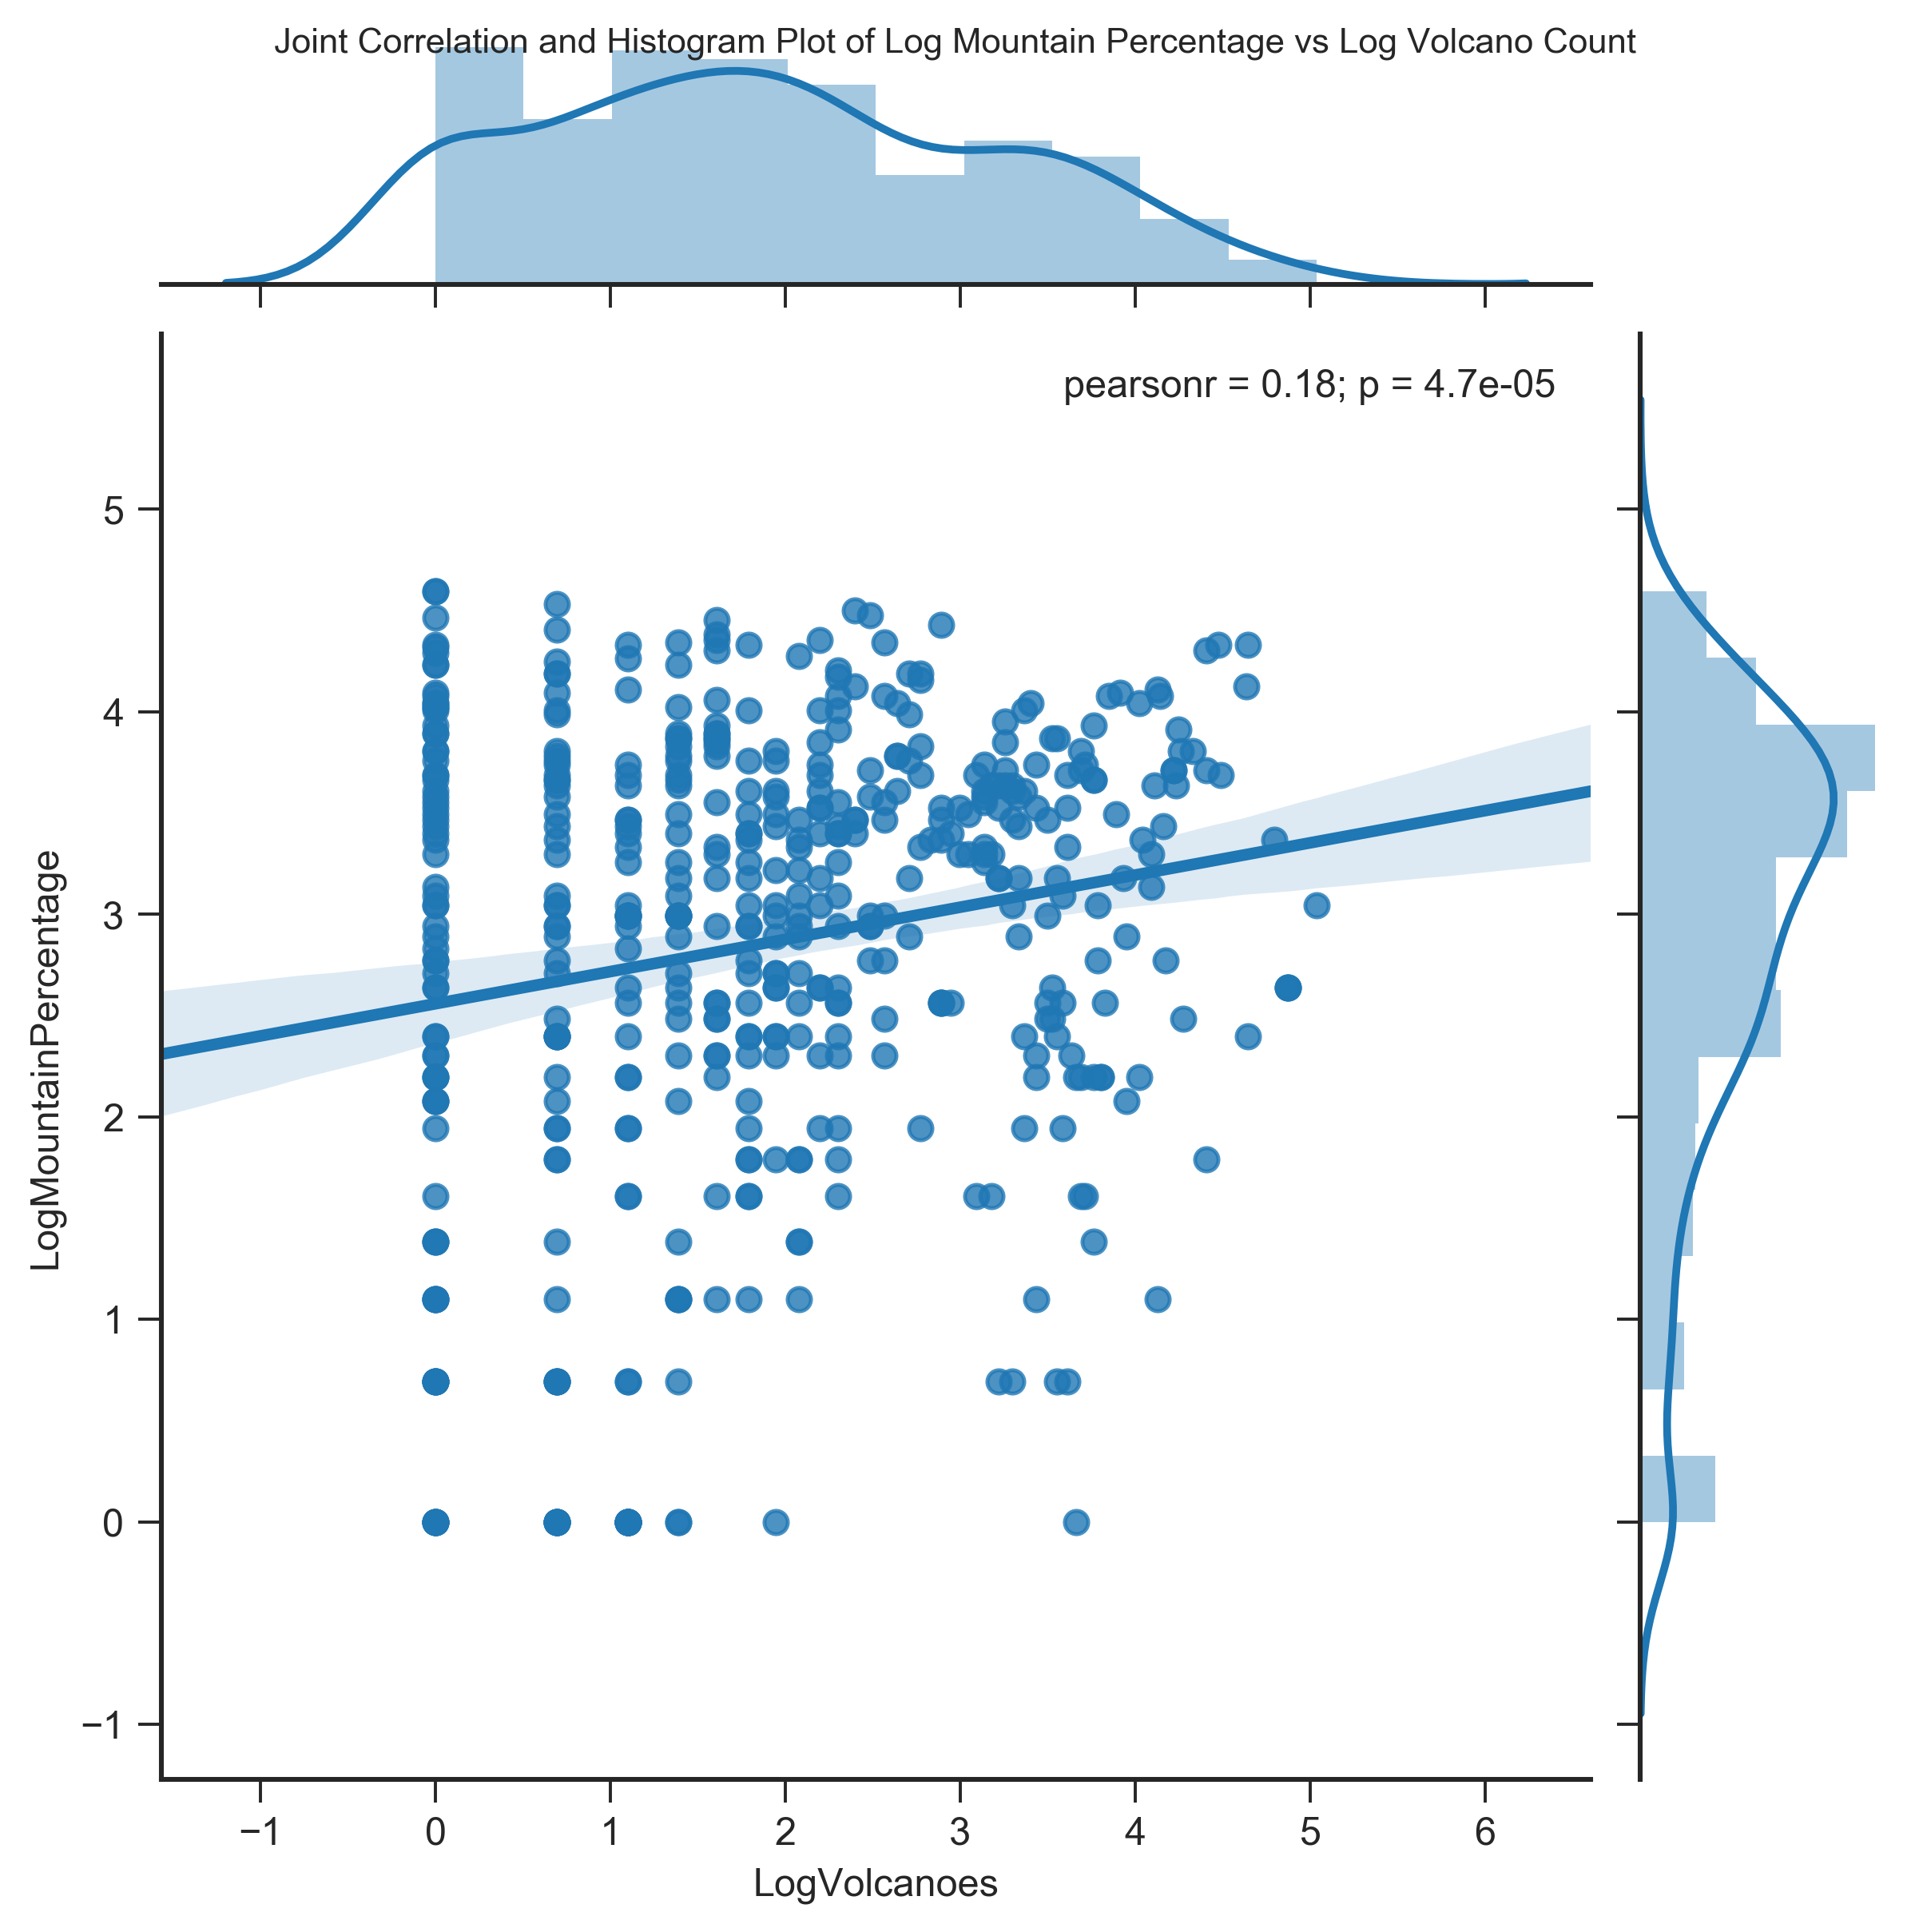

In [25]:
title = 'Joint Correlation and Histogram Plot of Log Mountain Percentage vs Log Volcano Count'
correlationPlot(samples, 'LogVolcanoes', 'LogMountainPercentage', title)

It appears surprisingly that the correlation between volcanoes and mountains is not as high as for the the other two prospective predictors. This is probably because although volcanoes are usually mountains, many places have mountains that are not volcanoes.

<a name="TectonicPredictors"></a>
### Single Tectonic Features As Predictors

It is clear from the analysis above that all three of the tectonic predictors are useful as predictors of the presence of mines with varying degrees of predictive power. This holds true even for mountains, which do not necessarily involve tectonic geological settings that are still active.

It may be possible to get even stronger predictions using a multivariate model combining these variables. In order to see if this is worthwhile, however, it is first necessary to test the degree to which they can be correlated with each other. My suspicion based on my study of the map distribution of these features is that each can be present in the overlapping areas, but this is not always the case, so a model that combines all three predictors should, in theory, cover for situations when one of the variables is stonger as a predictor in an area than the other two. 

<a name="DA"></a>
## Analysis of Aggregated Data

<a name="Regression"></a>
### Ordinary Least Squares Regression

I will now try single variable analysis combinations of two predictors and then all three to see which combination is the best combination of predictors for the presence of metal mines. I will not try single variable regression because we already know from the analysis above that individually each variable can only loosely predict the presence of mines.

I added the filter system below to tweak the cirteria for slection of samples. I did get one interesting result by using it, which I will show first:

In [26]:
filtered = samples[(samples['MountainPercentage'] > 80)]
len(filtered)

22

In [27]:
smf.ols(formula = 'Mines ~ 1 + Volcanoes + I(Volcanoes ** 2.0) + Earthquakes + I(Earthquakes ** 2.0) + MountainPercentage + I(MountainPercentage ** 2.0)', data = filtered.dropna()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Mines   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Mon, 28 May 2018   Prob (F-statistic):                nan
Time:                        22:45:49   Log-Likelihood:                 115.14
No. Observations:                   5   AIC:                            -220.3
Df Residuals:                       0   BIC:                            -222.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.3990        inf         -0        nan         nan         nan
Volcanoes                        3.2195        inf          0        nan         nan         nan
I(Volcanoes ** 2.0)              7.8423        inf          0        nan         nan         nan
Earthquakes                     13.9762        inf          0        nan         nan         nan
I(Earthquakes ** 2.0)           -0.0400        inf         -0        nan         nan         nan
MountainPercentage             -16.2992        inf         -0        nan         nan         nan
I(MountainPercentage ** 2.0)     0.0417        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.406
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.488
Skew:                          -0.083   Prob(JB):                        0.784
Kurtosis:                       1.479   Cond. No.                     2.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
[3] The condition number is large, 2.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

An R-squared value of 1.0 indicates perfect correlation between the tectonic predictor variables and the response mine count variable. However, it is telling that the Prob (F-statistic) reading is undefined. I'm not specifically what that means, but as you can see on the plot below, there are only two locations in the world where 80% of the land area within a 500km radius is mountains - The Tibetan Plateau and Himalayas, and WCanadian Rocky Mountains. This means these areas are not representative of the world as a whole. However, it does also raise the question as to whether the sample frame I chose is still too big. Maybe one with 250km or 100km radius would have been better.

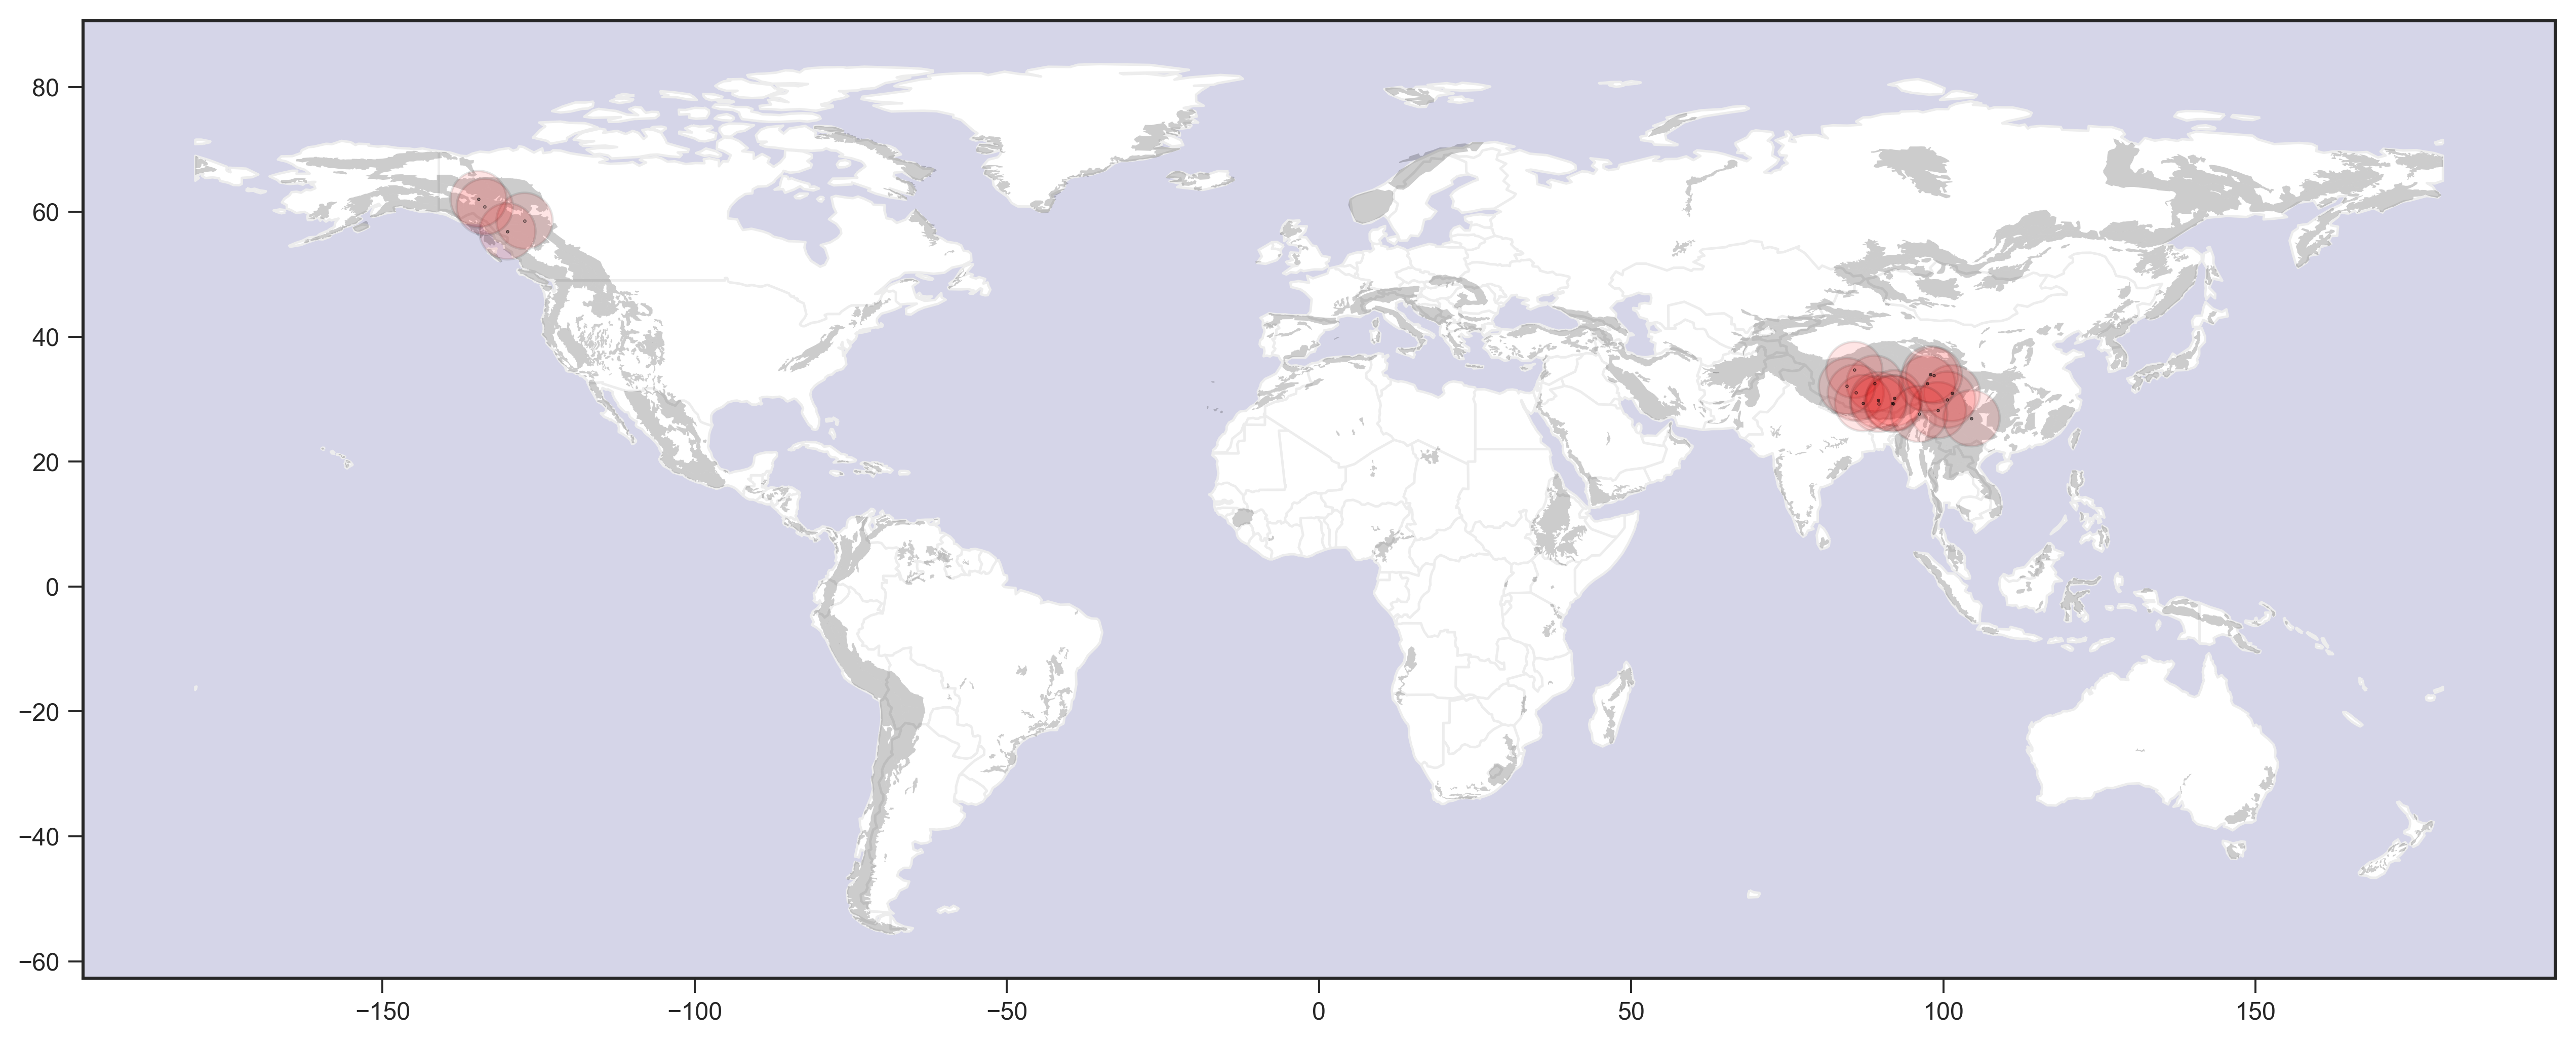

In [28]:
plotSampleLocations(filtered, 500000)

This is a very high R-squared value found with the tight criteria set on the samples allowed in the analysis, but since it only involves 22 points and the probability of the F-statistic is undefined it is probably an example of torturing the data until it yields the answer I want. However, I have been saying that tighter criteria around selection of different types of geographical regions may solve the problems I have been having with my models. If I choose a larger number of samples specifically from regions with at least a few volcanoes and around 50% mountains, maybe the result will show a good fit between predictors and response variables. 

Since it takes a couple of hours to sample a thousand or more cicles of 500 km radius with the sampling algorithm I designed though, I have to be reasonably sure I'm going to find something interesting by being this specific.

As designed my sampling method does not predict as well as I hoped, or even as well as it appears it should from looking at maps as I will now show.

In [29]:
filtered = samples
len(filtered)

1382

Volcanoes and mountains together as predictors using first-order polynomials:

In [30]:
smf.ols(formula = 'Mines ~ 1 + Volcanoes + MountainPercentage', data = filtered.dropna()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Mines   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     20.96
Date:                Mon, 28 May 2018   Prob (F-statistic):           2.54e-09
Time:                        22:45:52   Log-Likelihood:                -1942.7
No. Observations:                 352   AIC:                             3891.
Df Residuals:                     349   BIC:                             3903.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             40.4696      6.155      6.575      0.000      28.365      52.575
Volcanoes              0.2437      0.143      1.703      0.089      -0.038       0.525
MountainPercentage     1.0551      0.171      6.182      0.000       0.719       1.391
==============================================================================
Omnibus:                       30.638   Durbin-Watson:                   1.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.587
Skew:                           0.716   Prob(JB):                     1.14e-08
Kurtosis:                       3.666   Cond. No.                         72.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Prob(F-statistic) is low at below 0.05, so the reading of R-squared is a significant result. However, with an R-squared of only 0.1 (where 1.0 indicates perfect correlation), the correlation is not a strong one.

Volcanoes and mountains together as predictors using second-order polynomials:

In [31]:
smf.ols(formula = 'Mines ~ 1 + Volcanoes + I(Volcanoes ** 2.0) + MountainPercentage + I(MountainPercentage ** 2.0)', data = filtered.dropna()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Mines   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     12.56
Date:                Mon, 28 May 2018   Prob (F-statistic):           1.49e-09
Time:                        22:45:52   Log-Likelihood:                -1938.9
No. Observations:                 352   AIC:                             3888.
Df Residuals:                     347   BIC:                             3907.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       24.3387      8.570      2.840      0.005       7.483      41.194
Volcanoes                        0.1858      0.333      0.559      0.577      -0.468       0.840
I(Volcanoes ** 2.0)              0.0004      0.003      0.135      0.892      -0.006       0.007
MountainPercentage               2.3824      0.513      4.641      0.000       1.373       3.392
I(MountainPercentage ** 2.0)    -0.0179      0.007     -2.746      0.006      -0.031      -0.005
==============================================================================
Omnibus:                       31.283   Durbin-Watson:                   1.192
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.351
Skew:                           0.732   Prob(JB):                     7.75e-09
Kurtosis:                       3.636   Cond. No.                     6.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Second-order polynomials produce a higher R-Squared value and so a better fit between predictors and response variables, and again the probability of the f-statistic is lower than 0.05 so the R-squared is significant. An R-squared of 0.126 still indicates only a weak relationship, however. 

It is perhaps not surprising the second order polynomials may produce a better fit to the data since in the last section we needed to use log-transformations to establish a more normal distribution in the predictors. It suggests curvilinear relationship between the un-transformed predictors and the response variable.

I don't want to continue on to fitting a 3rd-order polynomial, however, without seeing a clear plot showing a reasonably obvious  curvilinear shape to plots of these relationships. Unfortunately since the plots of all individual predictors vs mine counts have points that are heavily spread out, I can't tell by inspecting them whehter a curved relationship exists or not. My feeling is that making such choices should be made on a sound theoretical basis, such as known reasons why a curvilinear relationship exists. For example, population growth curves have a known and easily observed pattern of natural exponential growth, so it is natural to use a second-order polynomial when dealing with this kind of data, but a third-order polynomial would be inappropriate unless there is another factor involved that leads to more variation in the relationship.

On the basis that I believe there is curvilinear relationship given the need to log-transform the predictors, I will continue to use second-order polynomials here.

One further observation when looking at the P>|t| values for each variable is that all are below 0.05, which is the threshold for significance, except for the Volcanoes squared term. I will try the calculation above again with this term left out. 

Volcanoes and earthquakes together as predictors using second-order polynomials:

In [32]:
smf.ols(formula = 'Mines ~ 1 + Volcanoes + MountainPercentage + I(MountainPercentage ** 2.0)', data = filtered.dropna()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Mines   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     16.78
Date:                Mon, 28 May 2018   Prob (F-statistic):           3.32e-10
Time:                        22:45:52   Log-Likelihood:                -1938.9
No. Observations:                 352   AIC:                             3886.
Df Residuals:                     348   BIC:                             3901.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       24.1822      8.480      2.852      0.005       7.504      40.860
Volcanoes                        0.2266      0.142      1.596      0.111      -0.053       0.506
MountainPercentage               2.3706      0.505      4.693      0.000       1.377       3.364
I(MountainPercentage ** 2.0)    -0.0178      0.006     -2.764      0.006      -0.030      -0.005
==============================================================================
Omnibus:                       31.356   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.452
Skew:                           0.733   Prob(JB):                     7.37e-09
Kurtosis:                       3.635   Cond. No.                     4.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This does not improve the R-squared value, but all the P>|t| values are even lower, as is the prob (F-statistic). This suggests only a first order polynomial involving volcano counts may be useful in the final model.

Looking now and volcanoes and earthquakes together:

In [33]:
smf.ols(formula = 'Mines ~ 1 + Volcanoes + I(Volcanoes ** 2.0) + Earthquakes + I(Earthquakes ** 2.0)', data = filtered.dropna()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Mines   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9788
Date:                Mon, 28 May 2018   Prob (F-statistic):              0.419
Time:                        22:45:52   Log-Likelihood:                -1960.7
No. Observations:                 352   AIC:                             3931.
Df Residuals:                     347   BIC:                             3951.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                67.7156      4.947     13.689      0.000      57.986      77.445
Volcanoes                 0.4019      0.412      0.976      0.330      -0.408       1.212
I(Volcanoes ** 2.0)      -0.0013      0.004     -0.353      0.725      -0.009       0.006
Earthquakes               0.0110      0.029      0.380      0.704      -0.046       0.068
I(Earthquakes ** 2.0) -7.798e-06   1.69e-05     -0.461      0.645    -4.1e-05    2.54e-05
==============================================================================
Omnibus:                       59.074   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.374
Skew:                           1.097   Prob(JB):                     2.89e-19
Kurtosis:                       4.005   Cond. No.                     8.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using volcanoes and earthquakes together the probability of F-statistic is less than 5%, suggesting the observed value of R-squared is significant. The R-squared value is very low though, so the correlation of volcanoes and earthquakes to mine counts is a very weak one.

Looking closely at the the P>|t| values it is clear again that Volcanoes squared has a P>|t| value which is too high at 0.7, as are both the equivalent values associated with Earthquakes. This suggests first-order Volcano counts may be a good predictor on its own, which I will try now. 

In [34]:
smf.ols(formula = 'Mines ~ 1 + Volcanoes', data = filtered.dropna()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Mines   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.349
Date:                Mon, 28 May 2018   Prob (F-statistic):             0.0681
Time:                        22:45:52   Log-Likelihood:                -1961.0
No. Observations:                 352   AIC:                             3926.
Df Residuals:                     350   BIC:                             3934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.6005      4.164     16.715      0.000      61.411      77.790
Volcanoes      0.2753      0.150      1.830      0.068      -0.021       0.571
==============================================================================
Omnibus:                       60.237   Durbin-Watson:                   1.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.724
Skew:                           1.111   Prob(JB):                     8.93e-20
Kurtosis:                       4.021   Cond. No.                         33.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Clearly it is not a good predictor on its own. The probability of the F-statistic and the P value for volcanoes as a predictor are both okay, but the R-squared is low indicating only a weak correlation. 

Mountains and earthquakes together as predictors using second-order polynomials:

In [35]:
smf.ols(formula = 'Mines ~ 1 + MountainPercentage + I(MountainPercentage ** 2.0) + Earthquakes + I(Earthquakes ** 2.0)', data = filtered.dropna()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Mines   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     12.92
Date:                Mon, 28 May 2018   Prob (F-statistic):           8.18e-10
Time:                        22:45:52   Log-Likelihood:                -1938.3
No. Observations:                 352   AIC:                             3887.
Df Residuals:                     347   BIC:                             3906.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       22.9630      8.637      2.659      0.008       5.976      39.950
MountainPercentage               2.5546      0.512      4.989      0.000       1.547       3.562
I(MountainPercentage ** 2.0)    -0.0195      0.006     -3.018      0.003      -0.032      -0.007
Earthquakes                     -0.0019      0.023     -0.082      0.935      -0.048       0.044
I(Earthquakes ** 2.0)          1.19e-05   1.47e-05      0.811      0.418    -1.7e-05    4.08e-05
==============================================================================
Omnibus:                       31.287   Durbin-Watson:                   1.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.359
Skew:                           0.732   Prob(JB):                     7.72e-09
Kurtosis:                       3.637   Cond. No.                     1.65e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With the probability of F-statistic at less than 5%, the R-squared is useful as a measure of the correlation of mountains and earthquakes with mine counts. Again, however, it is not strong at 0.13. Looking at the P values for each predictor though we see that the Earthquakes first-order term P value is too high.

Trying the calculation again without this term:

In [36]:
smf.ols(formula = 'Mines ~ 1 + MountainPercentage + I(MountainPercentage ** 2.0) + I(Earthquakes ** 2.0)', data = filtered.dropna()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Mines   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     17.27
Date:                Mon, 28 May 2018   Prob (F-statistic):           1.78e-10
Time:                        22:45:52   Log-Likelihood:                -1938.3
No. Observations:                 352   AIC:                             3885.
Df Residuals:                     348   BIC:                             3900.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       22.8661      8.544      2.676      0.008       6.062      39.670
MountainPercentage               2.5500      0.508      5.017      0.000       1.550       3.550
I(MountainPercentage ** 2.0)    -0.0195      0.006     -3.022      0.003      -0.032      -0.007
I(Earthquakes ** 2.0)         1.079e-05   5.51e-06      1.956      0.051   -5.89e-08    2.16e-05
==============================================================================
Omnibus:                       31.230   Durbin-Watson:                   1.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.272
Skew:                           0.731   Prob(JB):                     8.06e-09
Kurtosis:                       3.635   Cond. No.                     1.64e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With this modification, the P values are all very low, though the R-squared is no higher than before.

Mountains, volcanoes and earthquakes together as predictors using second-order polynomials:

In [37]:
smf.ols(formula = 'Mines ~ 1 + MountainPercentage + I(MountainPercentage ** 2.0) + Volcanoes + I(Volcanoes ** 2.0) + Earthquakes + I(Earthquakes ** 2.0)', data = filtered.dropna()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Mines   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     8.629
Date:                Mon, 28 May 2018   Prob (F-statistic):           9.32e-09
Time:                        22:45:52   Log-Likelihood:                -1938.1
No. Observations:                 352   AIC:                             3890.
Df Residuals:                     345   BIC:                             3917.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       22.6480      8.722      2.597      0.010       5.493      39.803
MountainPercentage               2.5017      0.523      4.785      0.000       1.473       3.530
I(MountainPercentage ** 2.0)    -0.0189      0.007     -2.864      0.004      -0.032      -0.006
Volcanoes                        0.1651      0.394      0.419      0.676      -0.611       0.941
I(Volcanoes ** 2.0)             -0.0006      0.003     -0.160      0.873      -0.007       0.006
Earthquakes                     -0.0086      0.027     -0.315      0.753      -0.063       0.045
I(Earthquakes ** 2.0)         1.325e-05   1.62e-05      0.816      0.415   -1.87e-05    4.52e-05
==============================================================================
Omnibus:                       31.691   Durbin-Watson:                   1.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.949
Skew:                           0.738   Prob(JB):                     5.75e-09
Kurtosis:                       3.641   Cond. No.                     1.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With a probability of the F-statistic at less than 0.05, the R-squared is significant. The R-squared is no better than for mountains and earthquakes together, however, which is the higheset R-squared value I have seen so far among the different combinations of predictors I have tried.

Looking at the P values for individual terms in the polynomial I see that some are again still too high, such as again ones associated with volcanoes and earthquakes.

Now that I understand that I can assess the value of each term in the polynomial by looking at P values for the term, I will follow a procedure where I start with a third-order polynomial and successively drop out the term with the highest P-value over the threshhold of 0.05 until all the terms are below the threshhold. 

In [38]:
smf.ols(formula = 'Mines ~ 1 + MountainPercentage + I(MountainPercentage ** 2.0)+ I(MountainPercentage ** 3.0) + Volcanoes + I(Volcanoes ** 2.0) + I(Volcanoes ** 3.0) + Earthquakes + I(Earthquakes ** 2.0) + I(Earthquakes ** 3.0)', data = filtered.dropna()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Mines   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     5.896
Date:                Mon, 28 May 2018   Prob (F-statistic):           1.16e-07
Time:                        22:45:52   Log-Likelihood:                -1937.3
No. Observations:                 352   AIC:                             3895.
Df Residuals:                     342   BIC:                             3933.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       27.1158     11.707      2.316      0.021       4.090      50.142
MountainPercentage               2.2377      1.237      1.810      0.071      -0.195       4.670
I(MountainPercentage ** 2.0)    -0.0074      0.034     -0.218      0.828      -0.075       0.060
I(MountainPercentage ** 3.0)    -0.0001      0.000     -0.414      0.679      -0.001       0.000
Volcanoes                       -0.4030      0.777     -0.518      0.605      -1.932       1.126
I(Volcanoes ** 2.0)              0.0134      0.017      0.787      0.432      -0.020       0.047
I(Volcanoes ** 3.0)          -7.273e-05   8.99e-05     -0.809      0.419      -0.000       0.000
Earthquakes                     -0.0343      0.053     -0.644      0.520      -0.139       0.071
I(Earthquakes ** 2.0)         6.409e-05   8.13e-05      0.788      0.431   -9.58e-05       0.000
I(Earthquakes ** 3.0)        -2.005e-08      3e-08     -0.668      0.505   -7.91e-08     3.9e-08
==============================================================================
Omnibus:                       29.563   Durbin-Watson:                   1.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.786
Skew:                           0.711   Prob(JB):                     2.80e-08
Kurtosis:                       3.594   Cond. No.                     4.06e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The P value for the mountain count squared is the highest and over the threshold, so dropping this out:

In [39]:
smf.ols(formula = 'Mines ~ 1 + MountainPercentage + I(MountainPercentage ** 3.0) + Volcanoes + I(Volcanoes ** 2.0) + I(Volcanoes ** 3.0) + Earthquakes + I(Earthquakes ** 2.0) + I(Earthquakes ** 3.0)', data = filtered.dropna()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Mines   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6.646
Date:                Mon, 28 May 2018   Prob (F-statistic):           4.36e-08
Time:                        22:45:52   Log-Likelihood:                -1937.3
No. Observations:                 352   AIC:                             3893.
Df Residuals:                     343   BIC:                             3927.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       28.9702      8.032      3.607      0.000      13.172      44.768
MountainPercentage               1.9783      0.337      5.870      0.000       1.315       2.641
I(MountainPercentage ** 3.0)    -0.0002    5.3e-05     -3.098      0.002      -0.000   -5.99e-05
Volcanoes                       -0.3804      0.769     -0.494      0.621      -1.894       1.133
I(Volcanoes ** 2.0)              0.0128      0.017      0.764      0.446      -0.020       0.046
I(Volcanoes ** 3.0)          -6.965e-05   8.86e-05     -0.786      0.433      -0.000       0.000
Earthquakes                     -0.0331      0.053     -0.624      0.533      -0.137       0.071
I(Earthquakes ** 2.0)         6.191e-05   8.06e-05      0.768      0.443   -9.66e-05       0.000
I(Earthquakes ** 3.0)        -1.924e-08   2.98e-08     -0.647      0.518   -7.78e-08    3.93e-08
==============================================================================
Omnibus:                       29.320   Durbin-Watson:                   1.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.447
Skew:                           0.707   Prob(JB):                     3.31e-08
Kurtosis:                       3.592   Cond. No.                     2.78e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The P value for the count is the highest and over the threshold, so dropping this out:

In [40]:
smf.ols(formula = 'Mines ~ 1 + MountainPercentage + I(MountainPercentage ** 3.0) + I(Volcanoes ** 2.0) + I(Volcanoes ** 3.0) + Earthquakes + I(Earthquakes ** 2.0) + I(Earthquakes ** 3.0)', data = filtered.dropna()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Mines   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     7.577
Date:                Mon, 28 May 2018   Prob (F-statistic):           1.67e-08
Time:                        22:45:52   Log-Likelihood:                -1937.4
No. Observations:                 352   AIC:                             3891.
Df Residuals:                     344   BIC:                             3922.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       27.7254      7.619      3.639      0.000      12.741      42.710
MountainPercentage               1.9464      0.330      5.891      0.000       1.297       2.596
I(MountainPercentage ** 3.0)    -0.0002   5.09e-05     -3.085      0.002      -0.000   -5.69e-05
I(Volcanoes ** 2.0)              0.0051      0.006      0.840      0.401      -0.007       0.017
I(Volcanoes ** 3.0)          -3.206e-05   4.55e-05     -0.704      0.482      -0.000    5.75e-05
Earthquakes                     -0.0396      0.051     -0.773      0.440      -0.140       0.061
I(Earthquakes ** 2.0)         6.626e-05      8e-05      0.828      0.408   -9.11e-05       0.000
I(Earthquakes ** 3.0)         -1.99e-08   2.97e-08     -0.670      0.503   -7.83e-08    3.85e-08
==============================================================================
Omnibus:                       29.539   Durbin-Watson:                   1.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.733
Skew:                           0.711   Prob(JB):                     2.87e-08
Kurtosis:                       3.588   Cond. No.                     2.64e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Almost all the P values for terms are below 0.05, so this model fits to the data quite well. Hoever, following Okham's Razor (the simplest model that fits the data is usually the best) I will try to eliminate as many second and third order terms as I can by continuing to eliminate the ones with the highest P-value.

The earthquakes cubed term has the highest P-value at 0.503, and acutually this one is still slightly over the threshold, so eliminating this one:

In [41]:
smf.ols(formula = 'Mines ~ 1 + MountainPercentage + I(MountainPercentage ** 3.0) + I(Volcanoes ** 2.0) + I(Volcanoes ** 3.0) + Earthquakes + I(Earthquakes ** 2.0)', data = filtered.dropna()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Mines   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     8.779
Date:                Mon, 28 May 2018   Prob (F-statistic):           6.49e-09
Time:                        22:45:52   Log-Likelihood:                -1937.7
No. Observations:                 352   AIC:                             3889.
Df Residuals:                     345   BIC:                             3916.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       27.5843      7.610      3.625      0.000      12.617      42.551
MountainPercentage               1.8889      0.319      5.925      0.000       1.262       2.516
I(MountainPercentage ** 3.0)    -0.0002   5.01e-05     -3.017      0.003      -0.000   -5.26e-05
I(Volcanoes ** 2.0)              0.0052      0.006      0.857      0.392      -0.007       0.017
I(Volcanoes ** 3.0)          -3.482e-05   4.53e-05     -0.768      0.443      -0.000    5.43e-05
Earthquakes                     -0.0098      0.025     -0.386      0.700      -0.060       0.040
I(Earthquakes ** 2.0)         1.365e-05   1.55e-05      0.879      0.380   -1.69e-05    4.42e-05
==============================================================================
Omnibus:                       31.013   Durbin-Watson:                   1.204
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.988
Skew:                           0.727   Prob(JB):                     9.29e-09
Kurtosis:                       3.640   Cond. No.                     1.52e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Elimination the cubed term on earthquake counts pushed up the P-value on the first order earthquakes term to 0.7, and also reduced the R-squared of the model, so trying it without this term:

In [42]:
smf.ols(formula = 'Mines ~ 1 + MountainPercentage + I(MountainPercentage ** 3.0) + I(Volcanoes ** 2.0) + I(Volcanoes ** 3.0) + I(Earthquakes ** 2.0)', data = filtered.dropna()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Mines   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     10.53
Date:                Mon, 28 May 2018   Prob (F-statistic):           2.00e-09
Time:                        22:45:52   Log-Likelihood:                -1937.8
No. Observations:                 352   AIC:                             3888.
Df Residuals:                     346   BIC:                             3911.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       27.1197      7.504      3.614      0.000      12.360      41.880
MountainPercentage               1.8776      0.317      5.922      0.000       1.254       2.501
I(MountainPercentage ** 3.0)    -0.0002      5e-05     -3.014      0.003      -0.000   -5.24e-05
I(Volcanoes ** 2.0)              0.0043      0.006      0.769      0.442      -0.007       0.015
I(Volcanoes ** 3.0)          -2.825e-05   4.19e-05     -0.674      0.501      -0.000    5.43e-05
I(Earthquakes ** 2.0)         8.307e-06   6.98e-06      1.190      0.235   -5.43e-06     2.2e-05
==============================================================================
Omnibus:                       30.765   Durbin-Watson:                   1.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.612
Skew:                           0.724   Prob(JB):                     1.12e-08
Kurtosis:                       3.633   Cond. No.                     1.50e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The P-value on the volcanoes cubed term is now a little over the threshold, so trying the model without this term:

In [43]:
smf.ols(formula = 'Mines ~ 1 + MountainPercentage + I(MountainPercentage ** 3.0) + I(Volcanoes ** 2.0) + I(Earthquakes ** 2.0)', data = filtered.dropna()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Mines   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     13.07
Date:                Mon, 28 May 2018   Prob (F-statistic):           6.31e-10
Time:                        22:45:53   Log-Likelihood:                -1938.0
No. Observations:                 352   AIC:                             3886.
Df Residuals:                     347   BIC:                             3905.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       27.4533      7.482      3.669      0.000      12.737      42.169
MountainPercentage               1.9019      0.315      6.042      0.000       1.283       2.521
I(MountainPercentage ** 3.0)    -0.0002   4.99e-05     -3.064      0.002      -0.000   -5.47e-05
I(Volcanoes ** 2.0)              0.0007      0.002      0.422      0.673      -0.003       0.004
I(Earthquakes ** 2.0)         9.112e-06   6.87e-06      1.325      0.186   -4.41e-06    2.26e-05
==============================================================================
Omnibus:                       30.446   Durbin-Watson:                   1.207
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.141
Skew:                           0.720   Prob(JB):                     1.42e-08
Kurtosis:                       3.627   Cond. No.                     1.43e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The P-value on the volcanoes squared term is now over the threshold 0f 0.05 at 0.67, so trying the model without this term:

In [44]:
smf.ols(formula = 'Mines ~ 1 + MountainPercentage + I(MountainPercentage ** 3.0) + I(Earthquakes ** 2.0)', data = filtered.dropna()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Mines   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     17.41
Date:                Mon, 28 May 2018   Prob (F-statistic):           1.49e-10
Time:                        22:45:53   Log-Likelihood:                -1938.1
No. Observations:                 352   AIC:                             3884.
Df Residuals:                     348   BIC:                             3900.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       27.4128      7.473      3.668      0.000      12.715      42.110
MountainPercentage               1.9135      0.313      6.110      0.000       1.298       2.530
I(MountainPercentage ** 3.0)    -0.0002   4.98e-05     -3.085      0.002      -0.000   -5.57e-05
I(Earthquakes ** 2.0)         1.084e-05   5.51e-06      1.967      0.050    1.86e-09    2.17e-05
==============================================================================
Omnibus:                       30.455   Durbin-Watson:                   1.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.162
Skew:                           0.719   Prob(JB):                     1.40e-08
Kurtosis:                       3.629   Cond. No.                     1.43e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All P-values for the terms in the predictor polynomial are very low, so it appears the R-squared value for this model is very significant. However, at 0.13, the R-squared indicates a fairly weak correlation between the predictor terms and the count of mines. 

<a name="Conclusion"></a>
## Conclusion

The model I have built proves a weak correlation between the presence of mountains and the occurrence of earthquakes in a region and the number of mines that are present. My analysis also suggests that volcanoes can have some predictive power for answering this question, but not as strong as for earthquakes. Combining volcanoes and earthquakes together in the same model also weakens the model, no doubt because earthquakes and volcanoes correlated relatively strongly with each other. 

I am surprised by still only finding a weak correlation even with a finer-grained form of analysis thant I used previously. Another model might work better, but at this stage I doubt the additional work has improved the predictive power of my aggregated data. There are few reasons I can think of for why this may be the case. 

Firstly, as I have stated earlier there are some geological settings that involve insitu metals for which I do not really have suitable data to use as predictors. The presence of metal mines in these sites could explain why I am still getting relatively weak predictions, even with better data than in my previous two assignments and a better method for sampling the data. The geological regions I am referring to are cratons and sedimentary deposits. Both of these could probably be predicted from data about the rock type in each area and this could in turn be used as a basis for predicting the presence of the metal mines in these area. However, I tried to gather data from a digital geological mapping dataset for the whole world I downloaded from a Canadian Government website. Unfortunately I couldn't make sense of it in the time available, so I have to leave this further analysis at this time. If I included such data I probably would be able to build a model that is solidly predictive, but my goal in this assignment was to see if these predictions can be made from things ordinary people see and experience, such as volcanoes, earthquakes and mountains, rather than from specialist geological knowledge.

It is possible that I might be able to predict these features from elevation data or other topological data. For example, topography with fairly even elevation across wide areas suggests alluvial plains where the dominant rock type is sedimentary. Similarly, although cratons have been eroded nearly flat by billions of years of erosion, there may be particular geographical markers that suggest their presence, such as particular patterns of drainage. At this point, however, I am speculating about how they may be identified.

I also suspect that my sampling frames are simply still too large. In my previous assignments they were whole countries, and since countries can be quite diverse in the geological settings present, this frame was simply too large, even possibly for a small country like New Zealand. My new sampling frame size is 500 km radius circles, but this is so large it can almost fit the whole of the North Island inside it. It is possible that a smaller frame would have sufficient resolution to distinguish between different kinds of geology. A limitation on making the frame smaller though, is that it needs to be able to aggregate a high enough number of data points from the surrounding area to show a clear pattern of difference between areas. Making the right size frame would therefore involve experimentation. Unfortunately 1000 samples of 500 km radius takes two hours to generate on my computer from the datasets I am using and the algorithm I have written. This places a limit on how much experimentation I could do in the time available.  

I should also make comment about predicting the number of mines in an area in this way. It is actually hard to define what is meant by 'number of mines'. I have had to adjust the data for the United States down significantly to match the data for the rest of the world. If I take this as meaning the US Geological Survey has nearly perfect information on mining and minable areas in its own country, while they have limited data for elsewhere, then maybe what I should acutally be doing is multiplying the predicted numbers of mines for countries outside of the US by some factor. Without going deeply into the question of how perfect the USGS Mineral Information Datataset is for the US, and how limited it is for other countries, there are simply too many unanswered questions to be sure that predictions made by a model built with this data will actually make accurate predictions in practice even if I had proven a better fit between the predictors and the number of metal mines.

Finally, though I don't think this caused big problems with the analysis, dealing with map projection issues can distort calculations. For example, in the case of calulating how many samples should be distributed in different parts of the world, it is difficult to get an even distribution due to the fact mapping a spherical map onto a flat surface is never perfect. I dealt with this by distributing samples according to country areas. I could have gone further by researching the projection that has the least distortion of area for each country, but this would have taken considerable time, and much beyond the time available for this assignment.

I have learnt a great deal from this process about analysis of data. One of the things I have learned, however, is that complex data can be hard to make any sense of. I can see a pattern on the map with my very human ability to recognise patterns, but it is still mystifying to me why it is so hard to prove this pattern exists and has structure and meaning.